



####  PROJECT 4: Communicate Data Findings
- Programmer/Analyst: Phyllis La Monica
- Course: Udacity Data Analyst Nanodegree
- DAND Project #4: Communicate Data Findings
- Date Submitted: 19 June 2019, Revised 20 June 2019



<a id='top'></a>

# Ford GoBike System Data
### by Phyllis La Monica




## Table of Contents



- [Introduction](#intro)

- [Part 1. Preliminary Wrangling](#section_1)
    - [Readiness Steps](#steps)
    - [Structure of Dataset](#structure)
    - [Main Interest](#interest) 
    - [Features for Investigation](#investigate)   <br>
    
    
- [Part 2. Exploratory Data Analysis](#section_2)
    - [Preliminary Steps](#prelim)
    - [Univariate Exploration](#univariate), [Summary](#uniSummary)
    - [Bivariate Exploration](#bivariate), [Summary](#biSummary)  
    - [Multivariate Exploration](#multivariate), [Summary](#multiSummary)    <br>
    
    
- [ References](#ref)

## Introduction

<p>The Ford GoBike System is a regional bike sharing system for the public. It covers the greater San Francisco Bay area in California. The dataset includes information about individual rides taken throughout the system. </p> 
<p>This investigation looks at data for all of 2018. </p>
<br><br>
- Data source: https://s3.amazonaws.com/baywheels-data/index.html
 



    

     


    
    





<a id='section_1'></a>
## Part I: Preliminary Wrangling


### Description of the Dataset: 

This dataset explores Ford_GoBike System data, specifically bike-sharing information on individual rides taken in the San Francisco Bay area.
- Since the datasets are given for each month, wrangling will first create a master dataset that includes all of 2018.

In [4]:
# Import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from IPython.core.display import display

<a id='steps'></a>
    
### Wrangling Readiness Steps:  Create a master dataframe for Ford_GoBike 2018 data

1. Load each monthly Ford_GoBike dataset for 2018 into a pandas dataframe.
2. Use pandas concat() function to combine the individual monthly dataframes into one master dataframe for all of 2018 data.



#### Starting point: Create path to data, initialize list to hold 12 dataframes

#### Note:
#### The following wrangling procedure, to load monthly data using loop, was suggested by reviewer!  Relay my thanks! Using a loop was quick, less error prone and simple compared to how I first loaded datasets, one by one for each month.

In [5]:
# Path to data folder
path = '/Users/pphallen/Desktop/project4data' 

In [7]:
# Initialize list to hold monthly dataframes
dfs = []

# Loop over,load,append files in data directory, add conditional excluding misc/hidden files in diry
for file in os.listdir(path):
       if "-fordgobike-tripdata.csv" in file:
            file = os.path.join(path,file)
            df = pd.read_csv(file)
            dfs.append(df)
            
            # display information about each dataframe
            print(file)
            print('Shape: ', df.shape)
            display(df.head(1))            

/Users/pphallen/Desktop/project4data/201802-fordgobike-tripdata.csv
Shape:  (106718, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114,Rhode Island St at 17th St,37.764478,-122.40257,1035,Subscriber,1988.0,Male,No


/Users/pphallen/Desktop/project4data/201811-fordgobike-tripdata.csv
Shape:  (134135, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,79489,2018-11-30 13:40:32.7690,2018-12-01 11:45:21.9720,NaN,NaN,37.42,-121.94,NaN,NaN,37.41,-121.94,4105,Customer,1982.0,Female,No


/Users/pphallen/Desktop/project4data/201809-fordgobike-tripdata.csv
Shape:  (186217, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,76491,2018-09-30 18:37:01.7710,2018-10-01 15:51:53.5530,120.0,Mission Dolores Park,37.76142,-122.426435,26.0,1st St at Folsom St,37.78729,-122.39438,903,Customer,1998.0,Female,No


/Users/pphallen/Desktop/project4data/201806-fordgobike-tripdata.csv
Shape:  (195968, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59088,2018-06-30 23:32:44.6590,2018-07-01 15:57:33.3160,76.0,McCoppin St at Valencia St,37.771662,-122.422423,95.0,Sanchez St at 15th St,37.766219,-122.43106,2100,Subscriber,1975.0,Male,Yes


/Users/pphallen/Desktop/project4data/201805-fordgobike-tripdata.csv
Shape:  (179125, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,56791,2018-05-31 21:41:51.4750,2018-06-01 13:28:22.7220,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,78,Folsom St at 9th St,37.773717,-122.411647,1230,Customer,NaN,NaN,No


/Users/pphallen/Desktop/project4data/201812-fordgobike-tripdata.csv
Shape:  (131363, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,68529,2018-12-31 20:03:11.7350,2019-01-01 15:05:21.5580,217.0,27th St at MLK Jr Way,37.817015,-122.271761,217.0,27th St at MLK Jr Way,37.817015,-122.271761,3305,Customer,NaN,NaN,No


/Users/pphallen/Desktop/project4data/201801-fordgobike-tripdata.csv
Shape:  (94802, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.76142,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No


/Users/pphallen/Desktop/project4data/201807-fordgobike-tripdata.csv
Shape:  (199222, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,59989,2018-07-31 18:20:32.7230,2018-08-01 11:00:22.1890,197.0,El Embarcadero at Grand Ave,37.808848,-122.24968,181.0,Grand Ave at Webster St,37.811377,-122.265192,1953,Customer,1995.0,Male,No


/Users/pphallen/Desktop/project4data/201808-fordgobike-tripdata.csv
Shape:  (192162, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,69465,2018-08-31 19:18:08.6130,2018-09-01 14:35:54.0640,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,813,Customer,NaN,NaN,No


/Users/pphallen/Desktop/project4data/201810-fordgobike-tripdata.csv
Shape:  (201458, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,80066,2018-10-31 20:49:03.1400,2018-11-01 19:03:30.0550,138.0,Jersey St at Church St,37.7509,-122.427411,147.0,29th St at Tiffany Ave,37.744067,-122.421472,3458,Customer,1987.0,Female,No


/Users/pphallen/Desktop/project4data/201803-fordgobike-tripdata.csv
Shape:  (111382, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,6,The Embarcadero at Sansome St,37.80477,-122.403234,341,Customer,1964.0,Female,No


/Users/pphallen/Desktop/project4data/201804-fordgobike-tripdata.csv
Shape:  (131169, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,72393,2018-04-30 22:49:32.6180,2018-05-01 18:56:06.3010,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,4,Cyril Magnin St at Ellis St,37.785881,-122.408915,3940,Customer,NaN,NaN,No


####  Use concat() function, create master dataframe: df_master.

In [13]:
df_master = pd.concat(dfs)

# display information about the new dataframe
print('Shape: ', df_master.shape)
display(df_master.head(1))

df_master.info(null_counts=True)

Shape:  (1863721, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.40257,1035,Subscriber,1988.0,Male,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131168
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


### Create copy of master dataframe: df.

In [14]:
# Create copy of master dataframe, print shape, compare with master
df = df_master.copy()
print('df shape: ', df.shape)
print('df dtypes: ', df.dtypes)

df shape:  (1863721, 16)
df dtypes:  duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [17]:
df.head(1)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,114.0,Rhode Island St at 17th St,37.764478,-122.40257,1035,Subscriber,1988.0,Male,No


 <a id='structure'></a>
## Structure of dataset
- The master dataset, df, is a compilation of data for all of 2018. 
- There are 1863721 rides in the master dataset. <br>
- There are 16 ride features presented: 
    1. Trip Duration (seconds)<br>
    2. Start Time and Date<br>
    3. End Time and Date<br>
    4. Start Station ID<br
    5. Start Station Name<br>
    6. Start Station Latitude<br>
    7. Start Station Longitude<br>
    8. End Station ID<br>
    9. End Station Name<br>
    10. End Station Latitude<br>
    11. End Station Longitude<br>
    12. Bike ID<br>
    13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)<br>
    14. Member Year of Birth<br>
    15. Member Gender<br>
    16. Bike Share for All Trip<br>
- Each monthly dataset was inspected for missing data and all but 2 data columns are complete.    
- Data columns for personal info features 14 and 15 have missing data.
- While most data is numeric, these are objects: station names, start and end times, user type and gender, and bike share for all.




 <a id='interest'></a>
###  Main feature(s) of interest
My primary interest is learning about those who use the busiest 5 start_stations and on what days. Note: Start_stations are the point of rental origin.
My secondary interest is learning how the characteristics of busiest and least busiest stations vary.


 <a id='investigate'></a>
### Features that support this investigation.
Looking at gender, age, and user type will characterize those who use the stations of interest.

- I expect younger, male, subscribers will make up the majority of those using these stations. 
- I expect many riders rent bikes to get to work, so Monday, as the beginning of the work week should be the busiest rider day, and weekdays in general busier than weekends.
- I expect the least busy start stations to mirror the characteristics of the busiest stations.

### Avoiding pitfalls__points to remember:
- The data presents information on the rides, and is not specific about individual users. All information is based on  characteristics of the rental, not the rider. 
- Rental durations are measured in minutes and do not relate to mileage.

    

<a id='section_2'></a>
## Exploratory Data Analysis

<a id='univariate'></a>
## Univariate Exploration


#### Preliminary Steps:
1. Drop unneeded columns for longitude, latitude, bike id
2. Create an 'age' column.
3. Convert date to datetime and create a 'dow' day-of-week column.
4. Create a column for duration in minutes, duration_min.
5. Create dataframes for the 5 busiest stations and the 5 least busiest stations.
6. Drop unneeded columns for longitude, latitude, bike id


<a id='prelim'></a>
### Prelim step 1: Drop unneeded columns for longitude, latitude, bike id

In [18]:

columns = ['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude','bike_id']
df.drop(columns, axis=1, inplace=True)
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,114.0,Rhode Island St at 17th St,Subscriber,1988.0,Male,No
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,324.0,Union Square (Powell St at Post St),Customer,1987.0,Male,No
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,15.0,San Francisco Ferry Building (Harry Bridges Pl...,Customer,1986.0,Female,No


In [19]:
df.duration_sec.value_counts(bins=20)

(-25.306, 4376.25]     1838787
(4376.25, 8691.5]        14351
(8691.5, 13006.75]        4186
(13006.75, 17322.0]       1952
(17322.0, 21637.25]        984
(21637.25, 25952.5]        579
(25952.5, 30267.75]        420
(30267.75, 34583.0]        280
(34583.0, 38898.25]        244
(56159.25, 60474.5]        215
(43213.5, 47528.75]        209
(38898.25, 43213.5]        203
(47528.75, 51844.0]        201
(51844.0, 56159.25]        196
(60474.5, 64789.75]        188
(64789.75, 69105.0]        171
(69105.0, 73420.25]        159
(73420.25, 77735.5]        151
(77735.5, 82050.75]        126
(82050.75, 86366.0]        119
Name: duration_sec, dtype: int64

### Prelim step 2: Create an 'age' column. Use age instead of birth year to improve clarity.

In [20]:
# Use pandas apply method and lambda fct 

df['age'] = df.apply(lambda row: row.member_birth_year * (-1) + 2019 , axis=1)

# Confirm dtype
print('column: age dtype:',df.age.dtype)

df.head(3)

column: age dtype: float64


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,114.0,Rhode Island St at 17th St,Subscriber,1988.0,Male,No,31.0
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,324.0,Union Square (Powell St at Post St),Customer,1987.0,Male,No,32.0
2,18587,2018-02-28 18:20:55.1900,2018-02-28 23:30:42.9250,93.0,4th St at Mission Bay Blvd S,15.0,San Francisco Ferry Building (Harry Bridges Pl...,Customer,1986.0,Female,No,33.0


In [21]:
# To convert float to int6 dype first find and fill NaN entries

In [22]:
# Find any NaNs
print('df.age.isna().sum(): ',df.age.isna().sum() )
print('df.age.notna().sum(): ',df.age.notna().sum() )
df.age.dtype

df.age.isna().sum():  110718
df.age.notna().sum():  1753003


dtype('float64')

In [23]:
# Convert dtype to int after filling in NaNs
df['age'] = df['age'].fillna(0).astype(int)
df.age.dtype

dtype('int64')

In [24]:
# Identify age outliers -- may remove after reviewing visualization
print('youngest user age: ',df.age.min() )  
print('oldest user age: ',df.age.max() ) 

youngest user age:  0
oldest user age:  138


In [25]:
df.age.value_counts(bins=5)

(27.6, 55.2]      1288385
(-0.139, 27.6]     472814
(55.2, 82.8]       100095
(82.8, 110.4]        1551
(110.4, 138.0]        876
Name: age, dtype: int64

### Prelim step 3: Convert date to datetime and create a 'day_started' showing day-of-week.

#### Use pandas: split start_time column. <br>Create cols: date_started, time_started.

In [26]:
# Create new columns then create day of week columns.

df['date_started'] = pd.to_datetime(df['start_time']).dt.date    
df['time_started'] = pd.to_datetime(df['start_time']).dt.time

df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,date_started,time_started
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,114.0,Rhode Island St at 17th St,Subscriber,1988.0,Male,No,31,2018-02-28,23:59:47.097000
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,324.0,Union Square (Powell St at Post St),Customer,1987.0,Male,No,32,2018-02-28,23:21:16.495000


In [27]:
# Create new column showing day of week (int) rental started
# https://stackoverflow.com/questions/46515267/pandas-get-day-of-week-from-date-type-column
# ref: pandas doc -- "Return the day of the week as an integer, where Monday is 0 and Sunday is 6."

df['day_started']= pd.to_datetime(df['date_started']).dt.dayofweek
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,date_started,time_started,day_started
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,114.0,Rhode Island St at 17th St,Subscriber,1988.0,Male,No,31,2018-02-28,23:59:47.097000,2
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,324.0,Union Square (Powell St at Post St),Customer,1987.0,Male,No,32,2018-02-28,23:21:16.495000,2


### Prelim step 4: Create a column for duration in minutes, duration_min.

In [28]:
# Use pandas apply method and lambda fct to convert seconds to minutes & create min col
df['duration_min'] = df.apply(lambda row: row.duration_sec / 60, axis=1)

print('column: duration_min dtype:',df.duration_min.dtype)
df.duration_min = df.duration_min.astype(int)
print('confirm duration_min convert dtype to int: ',df.duration_min.dtype)
df.head(2)  

column: duration_min dtype: float64
confirm duration_min convert dtype to int:  int64


,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,date_started,time_started,day_started,duration_min
0,598,2018-02-28 23:59:47.0970,2018-03-01 00:09:45.1870,284.0,Yerba Buena Center for the Arts (Howard St at ...,114.0,Rhode Island St at 17th St,Subscriber,1988.0,Male,No,31,2018-02-28,23:59:47.097000,2,9
1,943,2018-02-28 23:21:16.4950,2018-02-28 23:36:59.9740,6.0,The Embarcadero at Sansome St,324.0,Union Square (Powell St at Post St),Customer,1987.0,Male,No,32,2018-02-28,23:21:16.495000,2,15


In [29]:
df.duration_min.value_counts(bins=10)

(-0.439, 144.8]     1853153
(144.8, 288.6]         6128
(288.6, 432.4]         1559
(432.4, 576.2]          701
(576.2, 720.0]          447
(863.8, 1007.6]         411
(720.0, 863.8]          408
(1007.6, 1151.4]        360
(1151.4, 1295.2]        310
(1295.2, 1439.0]        244
Name: duration_min, dtype: int64

### Prelim step 5:  Create dataframes for 5 busiest and least busiest station ids

In [30]:
# Use groupby, get list of top 5 busiest station ids and show corresponding station names

df['start_station_name'].groupby(df['start_station_id']).value_counts().nlargest(5)

start_station_id  start_station_name                                       
15.0              San Francisco Ferry Building (Harry Bridges Plaza)           38461
67.0              San Francisco Caltrain Station 2  (Townsend St at 4th St)    37617
30.0              San Francisco Caltrain (Townsend St at 4th St)               35092
58.0              Market St at 10th St                                         34918
81.0              Berry St at 4th St                                           33716
Name: start_station_name, dtype: int64

In [31]:
# Use pandas query to create dataframe for 5  busiest stations

# http://pandas-docs.github.io/pandas-docs-travis/user_guide/indexing.html#the-query-method
#Special use of the == operator with list objects

df_busy = df.query('start_station_id == ["30","15","81","58","67"]')
df_busy.head(3)
df_busy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179804 entries, 83 to 131165
Data columns (total 16 columns):
duration_sec               179804 non-null int64
start_time                 179804 non-null object
end_time                   179804 non-null object
start_station_id           179804 non-null float64
start_station_name         179804 non-null object
end_station_id             179804 non-null float64
end_station_name           179804 non-null object
user_type                  179804 non-null object
member_birth_year          168677 non-null float64
member_gender              168683 non-null object
bike_share_for_all_trip    179804 non-null object
age                        179804 non-null int64
date_started               179804 non-null object
time_started               179804 non-null object
day_started                179804 non-null int64
duration_min               179804 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 23.3+ MB


In [32]:
# Confirm only start_station_ids are included
df_busy.start_station_id.value_counts()

15.0    38461
67.0    37617
30.0    35092
58.0    34918
81.0    33716
Name: start_station_id, dtype: int64

In [33]:
# Use groupby, get list of 5 least busiest station ids and show corresponding station names -- See comment following cell.
df['start_station_name'].groupby(df['start_station_id']).value_counts().nsmallest(7)


start_station_id  start_station_name                       
48.0              2nd St at S Park St                          11
234.0             Farnam St at Fruitvale Ave                   14
358.0             Williams Ave at 3rd St                       17
374.0             Viva Calle SJ                                25
208.0             William St at 4th St (Temporary Location)    26
358.0             Lane St at Van Dyke Ave                      35
359.0             Williams Ave at Apollo St                    91
Name: start_station_name, dtype: int64

#### RE: least busy stations -- excluded is temporary location 208. As station 358 is listed twice (& counts are low) station 359 is added.

In [34]:
###### Use pandas query to create dataframe for 5 least busiest stations

# http://pandas-docs.github.io/pandas-docs-travis/user_guide/indexing.html#the-query-method
# Special use of the == operator with list objects

df_notBusy = df.query('start_station_id == ["48","234","358","359", "374"]')
df_notBusy.head()
df_notBusy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 7373 to 111122
Data columns (total 16 columns):
duration_sec               353 non-null int64
start_time                 353 non-null object
end_time                   353 non-null object
start_station_id           353 non-null float64
start_station_name         353 non-null object
end_station_id             353 non-null float64
end_station_name           353 non-null object
user_type                  353 non-null object
member_birth_year          328 non-null float64
member_gender              328 non-null object
bike_share_for_all_trip    353 non-null object
age                        353 non-null int64
date_started               353 non-null object
time_started               353 non-null object
day_started                353 non-null int64
duration_min               353 non-null int64
dtypes: float64(3), int64(4), object(9)
memory usage: 46.9+ KB


In [35]:
# Confirm only listed start_station_ids are included
df_notBusy.start_station_id.value_counts()

234.0    174
359.0     91
358.0     52
374.0     25
48.0      11
Name: start_station_id, dtype: int64

## Univariate exploration for main focus variable: start_station_id
#### ...
#### Dataframes: df_busy, df_notBusy
#### Plot frequencies for each start station to compare similarities and differences.

In [36]:
# Show counts for main variables of interest: where the ride starts,  start_station_id   
# Plot main variable of interest using bar chart of frequencies


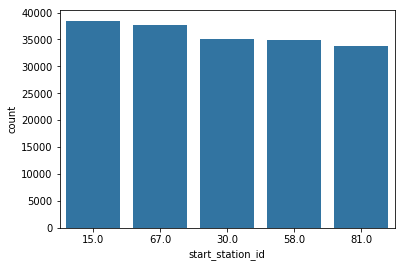

In [37]:
orderStations= df_busy['start_station_id'].value_counts().nlargest(5)
orderBusy = orderStations.index

base_color = sb.color_palette()[0]
sb.countplot(data = df_busy, x = 'start_station_id', order=orderBusy, color=base_color);

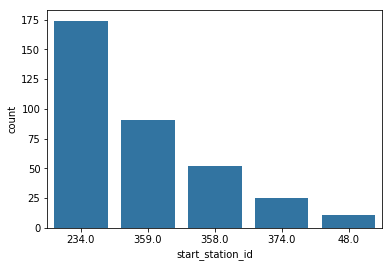

In [38]:
orderStations= df_notBusy['start_station_id'].value_counts().nlargest(5)
order_notBusy = orderStations.index

base_color = sb.color_palette()[0]
sb.countplot(data = df_notBusy, x = 'start_station_id', order=order_notBusy, color=base_color);

#### Comments: busiest stations show a consistency in rider counts not seen for the least busiest.

## Univariate Exploration of characterizing features

### age

#### Explore by dataframe. Look first at df_busy, then df_notBusy

In [39]:
# First look at stats and ranges of age distribution for df_busy
df_busy.age.describe()

print('Youngest user age: ',df_busy.age.min() )  
print('Oldest user age: ',df_busy.age.max() ) 
print('Mean user age: ',df_busy.age.mean() ) 


Youngest user age:  0
Oldest user age:  130
Mean user age:  34.42606393628618


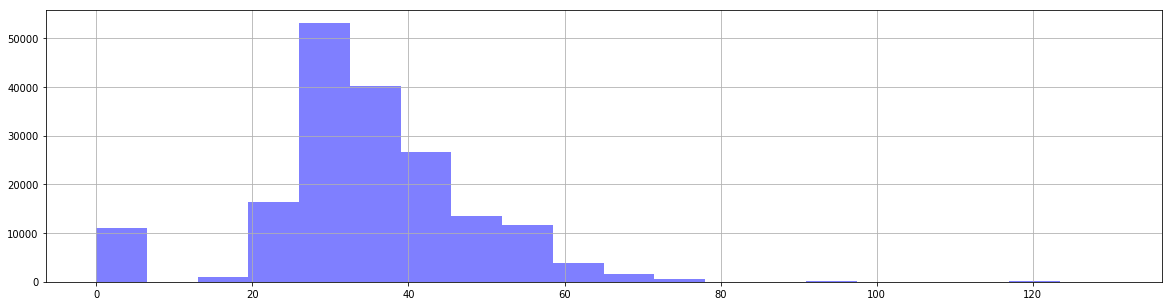

In [40]:
# Plot age frequency for df_busy
plt.figure(figsize=[20,5])
df_busy['age'].hist(alpha=0.5, bins=20,color='blue', label='Age') ;

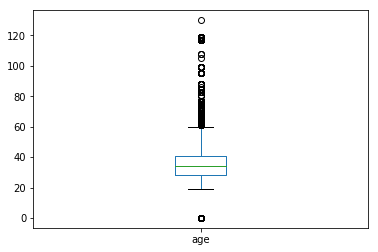

In [41]:
df_busy['age'].plot(kind='box'); # df_busy

#### These visualizations for the dataframe, df_busy, show outliers at both ends of the spectrum that are clearly not part of the main group in the distribution.
#### ...
#### Next explore the same visualizations for the least busy stations 

In [42]:
# First look at stats and ranges of age distribution for df_notBusy 
df_notBusy.age.describe()

print('Youngest user age: ',df_notBusy.age.min() )  
print('Oldest user age: ',df_notBusy.age.max() ) 
print('Mean user age: ',df_notBusy.age.mean() ) 


Youngest user age:  0
Oldest user age:  72
Mean user age:  32.611898016997166


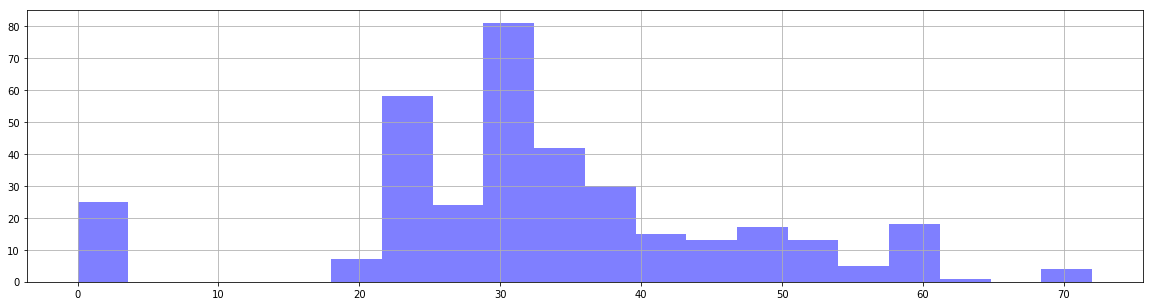

In [43]:
#Plot age frequency for df_notBusy
plt.figure(figsize=[20,5])
df_notBusy['age'].hist(alpha=0.5, bins=20,color='blue', label='Age') ;

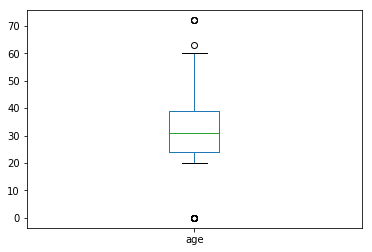

In [44]:
df_notBusy['age'].plot(kind='box');  # df_notBusy

#### The visualizations for the dataframe, df_notBusy, show outliers that clearly are separated at left & right tails of the distribution.
#### ...
#### Before going forward explore removing the outliers. The age range of 0 to 130 clearly includes non-living riders.

#### Data from visualizations and stats shows natural breaks before teenage years and ages above 80.
#### Create an age group > 13, and <81 for both dataframes so the main groups in each distribution are more clearly delineated.


In [45]:
# Create age group for df_busy: df_age_busy
df_age_busy = df_busy.query(' 13 < age < 81')

print('Youngest user age: ',df_age_busy.age.min() )  
print('Oldest user age: ',df_age_busy.age.max() ) 
print('Mean user age: ',df_age_busy.age.mean() ) 

Youngest user age:  19
Oldest user age:  80
Mean user age:  36.57806774245277


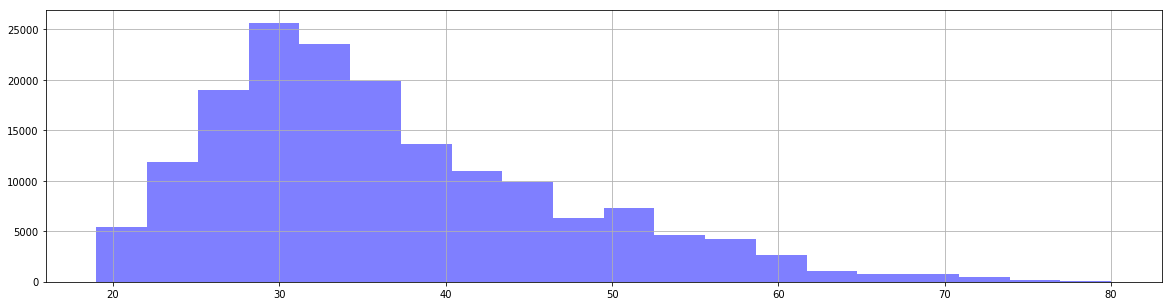

In [46]:
# Plot age group for df_age_busy
plt.figure(figsize=[20,5])
df_age_busy['age'].hist(alpha=0.5, bins=20,color='blue', label='Age') ;

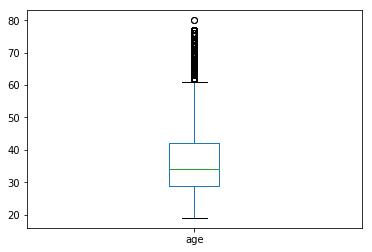

In [47]:
df_age_busy['age'].plot(kind='box'); # df_age_busy

#### Creating a specific age group for the dataframe, df_busy, shows a more oompact, right tail distribution. It is practical that riders over 70 be included as this age group is known to be active.
#### ...
#### Explore least busiest stations, df_notBusy

In [48]:
# Repeat steps for least busiest station, df_notBusy
# Create new age group, df_age_notBusy
df_age_notBusy = df_notBusy.query(' 13 < age < 81')

print('Youngest user age: ',df_age_notBusy.age.min() )  
print('Oldest user age: ',df_age_notBusy.age.max() ) 
print('Mean user age: ',df_age_notBusy.age.mean() ) 

Youngest user age:  20
Oldest user age:  72
Mean user age:  35.09756097560975


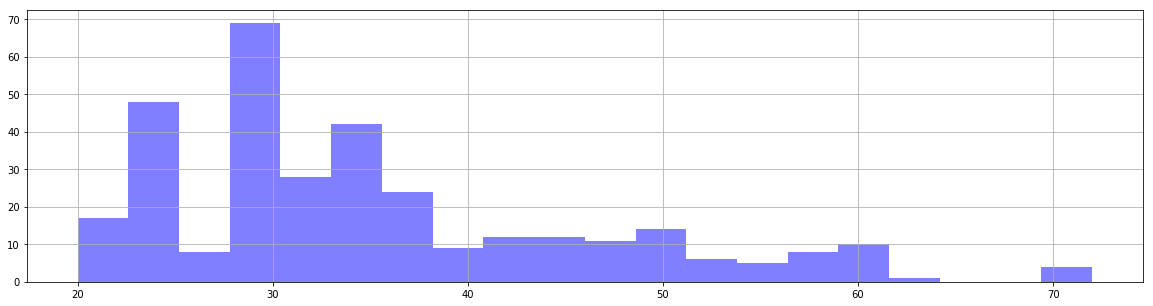

In [49]:
# Plot age group for df_notBusy
plt.figure(figsize=[20,5])
df_age_notBusy['age'].hist(alpha=0.5, bins=20,color='blue', label='Age') ;

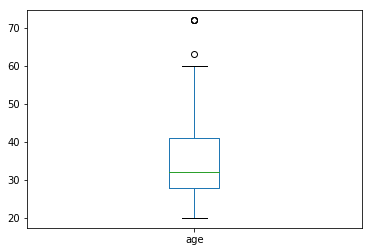

In [50]:
df_age_notBusy['age'].plot(kind='box'); # df_age_notBusy

#### The distribution of the specific age group for least busiest stations also tails to the right and shows a gap in the 60 to 70 age group. Also, there is a noticeable drop in the 20 to 30 age group. This can be explored in the bi- and multi- variate stages.

#### Comments:
#### The distribution for busiest start stations is consistent, the distribution for the least busy is 'choppy'. A consistent distribution surrounding the mean would lean toward users who rent daily to get to work.
#### Removing the outliers for age shows a more compact distribution for each dataframe.
#### It may be that creating a new 'grouped_age' column for each dataframe will be indicated. Leave as is for now.
#### ...

### user_type

In [51]:
# Busiest stations: show value counts for type of users for df_busy
df_busy.user_type.value_counts()

Subscriber    153596
Customer       26208
Name: user_type, dtype: int64

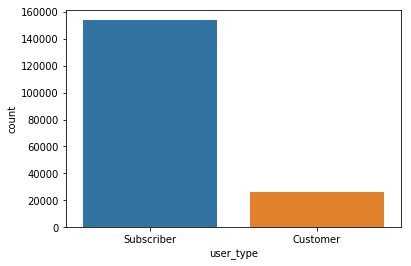

In [52]:
# Busiest stations, plot type of users for df_busy
sb.countplot(data = df_busy, x = 'user_type')


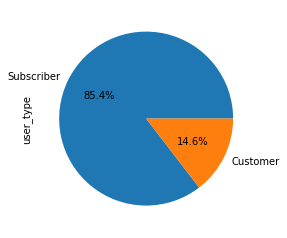

In [53]:
df_busy.user_type.value_counts().plot(kind='pie', autopct='%1.1f%%') ;  # df_busy


#### The pattern clearly indicates riders at the busiest start stations are more likely to be subscribers to the service.
#### ...
#### Explore df_notBusy

In [54]:
# Least busiest stations: show value counts for type of users for df_notBusy

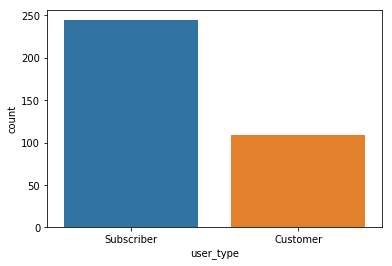

In [55]:
# Least busiest stations, plot type of users for df_notBusy
sb.countplot(data = df_notBusy, x = 'user_type');

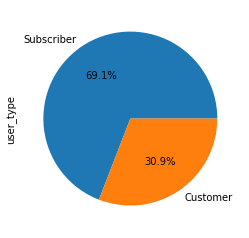

In [56]:
df_notBusy.user_type.value_counts().plot(kind='pie', autopct='%1.1f%%') ; # df_notBusy


#### Interesting, but not surprising, that the least busy stations are also used by subscribers. 
#### ...
#### Comments: Clearly, more subscribers than customers rent bikes, regardless of station type. However the proportion for the busiest start stations is higher at 85.4% as opposed to least busiest at 69.1%.
#### It could be useful to explore which user types ride on which days.
#### ...

### member_gender

In [57]:
# Busiest stations: show value counts for gender type for df_busy
df_busy.member_gender.value_counts()

Male      128353
Female     38865
Other       1465
Name: member_gender, dtype: int64

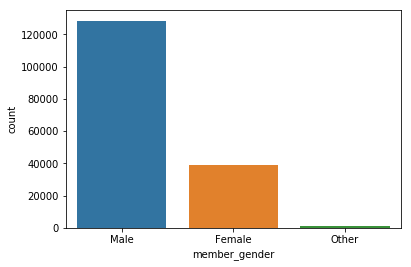

In [58]:
# Busiest stations, plot gender of users for df_busy
sb.countplot(data = df_busy, x = 'member_gender');

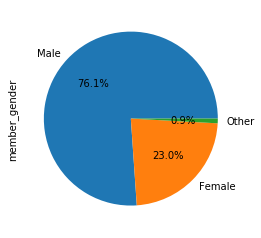

In [59]:
df_busy.member_gender.value_counts().plot(kind='pie', autopct='%1.1f%%') ; # df_busy


#### Males comprise the largest group of riders at the busiest start stations.
#### ...
#### Explore df_notBusy

In [60]:
# Least busiest stations: show value counts for gender type for df_notBusy
df_notBusy.member_gender.value_counts()

Male      251
Female     68
Other       9
Name: member_gender, dtype: int64

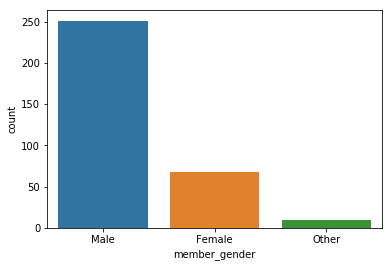

In [61]:
# Least busiest stations, plot gender of users for df_notBusy
sb.countplot(data = df_notBusy, x = 'member_gender');

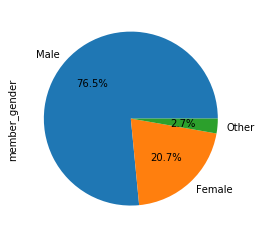

In [62]:
df_notBusy.member_gender.value_counts().plot(kind='pie', autopct='%1.1f%%') ; # df_notBusy



#### Males also comprise the greater majority of riders at the least busiest start stations.
#### ...
#### Comments: Proportions for gender use of busiest and least busiest start stations are so similar the differences are not significant. It would be interesting to learn if there is the same pattern for days on which rentals are made.

### day_started

In [63]:
# Busiest stations: show value counts for day rental started for df_busy
df_busy.day_started.value_counts(ascending=False)

1    34099
2    33199
3    32897
0    30921
4    28941
5    10983
6     8764
Name: day_started, dtype: int64

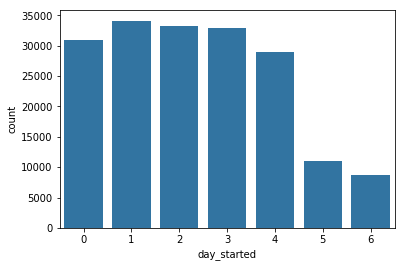

In [64]:
# Busiest stations, plot day rental started for df_busy
# Day - listed in order of day: 0 = monday

base_color = sb.color_palette()[0]
sb.countplot(data = df_busy, x = 'day_started', color = base_color);

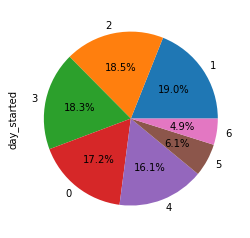

In [65]:
df_busy.day_started.value_counts().plot(kind='pie', autopct='%1.1f%%') ; # df_busy


#### Weekdays at the busiest start stations have the highest rentals, although Mondays are lighter than the rest. Weekends are definitely lower rental days.
#### ...
#### Explore df_notBusy

In [66]:
# Busiest stations: show value counts for day rental started for df_notBusy
df_notBusy.day_started.value_counts(ascending=False)

6    66
3    61
2    51
0    51
4    46
5    40
1    38
Name: day_started, dtype: int64

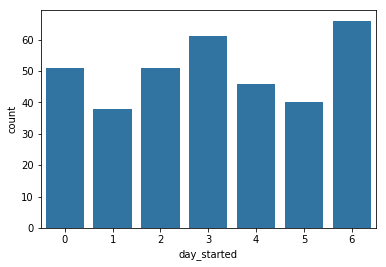

In [67]:
# Least Busiest stations, plot day rental started for df_notBusy
# Day - listed in order of day: 0 = monday

base_color = sb.color_palette()[0]
sb.countplot(data = df_notBusy, x = 'day_started', color = base_color);

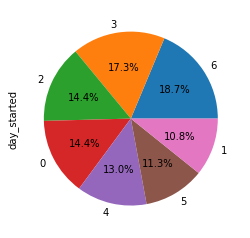

In [68]:
df_notBusy.day_started.value_counts().plot(kind='pie', autopct='%1.1f%%') ; # df_notBusy


#### Saturdays have the most rentals at the least busiest start stations. Nothing in the visualizations indicate a work week rental regimen.
#### ...
#### Comments: Busiest stations do have consistent daily work week traffic that drops off considerably on the weekend. Least busy stations have an irregular pattern with higher rentals on Sundays.  It would be interesting to know how  the day of rental relates to gender use.
#### ...
### duration_min


In [69]:
# Look at duration_min stats and ranges for df_busy
df_busy.duration_min.describe()

#print('Minimum rental interval: ',df_busy.duration_min.min() )  # Minimum rental interval:  1
#print('Maximum rental interval: ',df_busy.duration_min.max() )  # Maximum rental interval:  1423
#print('Mean rental interval: ',df_busy.duration_min.mean() ) # Mean rental interval:  13.755867500166849

count    179804.000000
mean         13.755868
std          35.627812
min           1.000000
25%           7.000000
50%          10.000000
75%          13.000000
max        1423.000000
Name: duration_min, dtype: float64

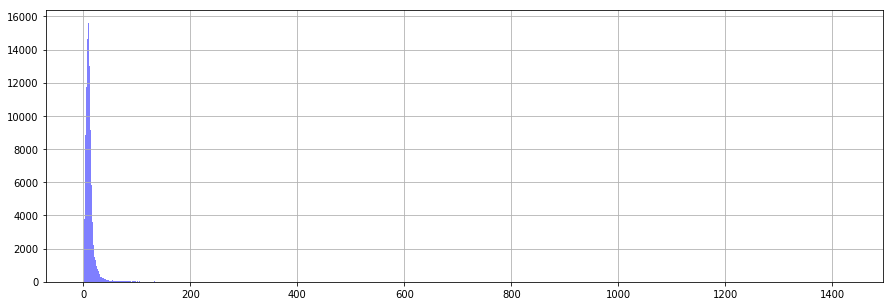

In [70]:
# Plot duration_min for df_busy
plt.figure(figsize=[15,5])
df_busy['duration_min'].hist(alpha=0.5,  bins = int(1423/1),color='blue', label='Rental Interval in Minutes') ;


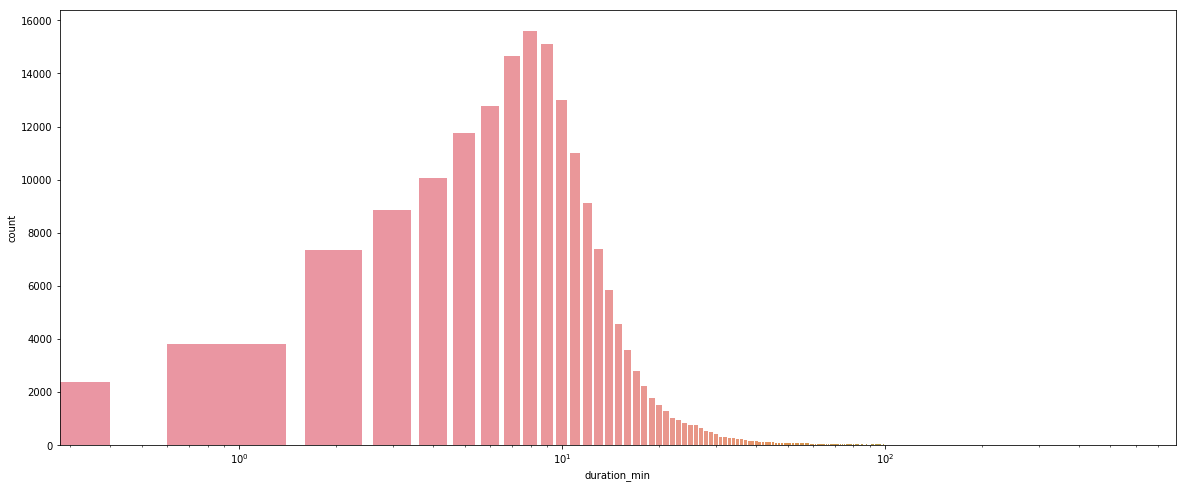

In [71]:
# Use log transformation and countplot to make data readable. 
# Typically used for skewed data, here used to clarify the data.
plt.figure(figsize=[20,8])
sb.countplot(data = df_busy, x = 'duration_min')
plt.xscale('log');

#### Rental durations tracked for the busiest start stations have a mean of 13.7 minutes., with 75% of durations being 13 minutes or less (ref: duration_min.describe] . Using the countplot with minutes shown in a log transformation clarifies the counts.
#### ...
#### Explore df_notBusy

In [72]:
# Look at duration_min stats and ranges for df_notBusy
df_notBusy.duration_min.describe()

#print('Minimum rental interval: ',df_notBusy.duration_min.min() )  # Minimum rental interval:  1
#print('Maximum rental interval: ',df_notBusy.duration_min.max() )  # Maximum rental interval:  937
#print('Mean rental interval: ',df_notBusy.duration_min.mean() ) # Mean rental interval: 26.93484419263456

count    353.000000
mean      26.934844
std       65.110385
min        1.000000
25%        5.000000
50%       17.000000
75%       30.000000
max      937.000000
Name: duration_min, dtype: float64

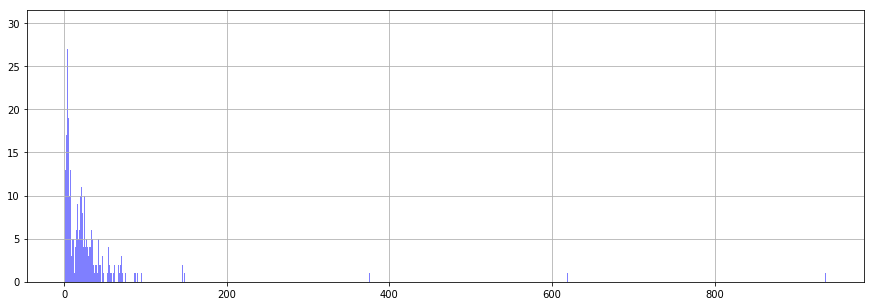

In [73]:
# Plot duration_min for df_notBusy
# Use bin size of 1 minute length, as used for busiest station, to keep a similarity.
plt.figure(figsize=[15,5])
df_notBusy['duration_min'].hist(alpha=0.5,  bins = int(937/1),color='blue', label='Rental Interval in Minutes') ;

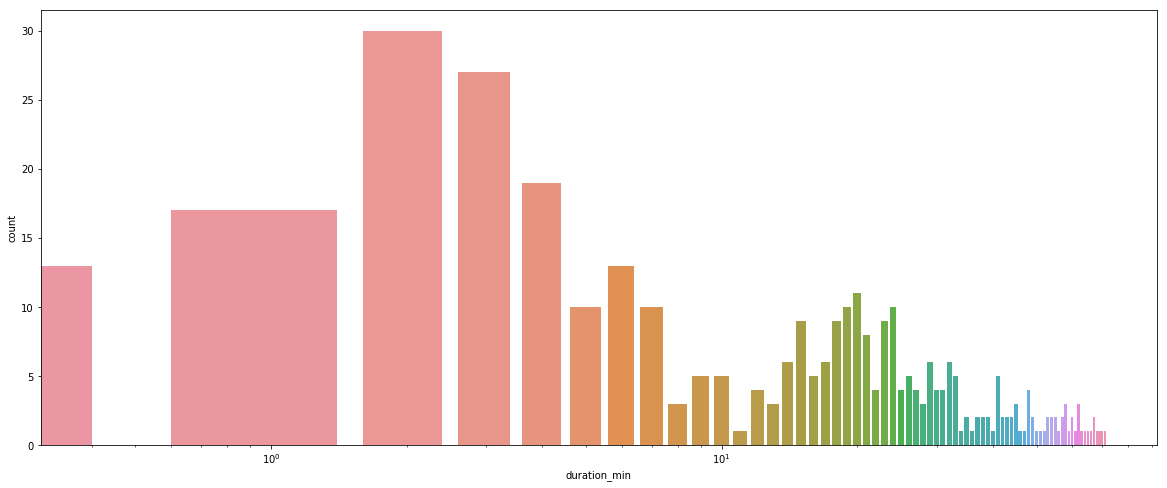

In [74]:
# Use log transformation to make data readable
plt.figure(figsize=[20,8])
sb.countplot(data = df_notBusy, x = 'duration_min')
plt.xscale('log');

#### The histogram for least busiest start stations shows a wider rental duration range, where the mean is 26 minutes and 75% of the durations being 30 minutes or less (ref:duration_min.describe). Using the countplot with minutes shown in a log transformation clarifies the counts.


### ...
#### Comment: There is a clear difference in rental durations for busiest and least busiest start station. Busiest stations have shorter rental durations, with 75% of rental durations at 13 minutes or less.
<ul> From .describe stats:
    <li>
        Busiest start stations: mean=13.7 minutes, 75% of rental durations=13 minutes.</li>
    <li>Least busiest start stations: mean=26 minutes, 75% of rental durations=30. minutes.</li>

#### ...



<a id='uniSummary'></a>
## End Univariate Exploration
### Discussion

- First a look at start stations as start_station_id is the focus characteristic. Busiest start stations have a similar rider count for all 5. Least busiest show no pattern. Could be these 5 are in less populous areas, however, location is a factor beyond the scope of this report.<br><br>
- In order to zone in on the focus I created dataframe subsets of the original dataframe (12 months of activity) and isolated the 5 busiest, as df_busy, and the 5 least busy, as df_notBusy. 

- The exploration of 'age' shows outliers for both dataframes. Both distributions show long right tail. In addition, the age range of 0 to 130 clearly includes non-living riders. The visualizations and data do support an expectation that younger riders make up the majority of renters.
<ul><li>It was important to see 'age' in more detail so a specific age range, same for both dataframe, was investigated. Visualizations and stats showed natural breaks at teenage years and ages above 80 so a range between 13 and 81 was chosen.</li><li> Using this specific age group for each dataframe, busiest start station visualizations show a more oompact distribution that tails to the right.</li><li>The distribution of the specific age group for least busiest stations also tails to the right and shows a gap in the 60 to 70 age group. Also, there is a noticeable drop in the 20 to 30 age group. This may prove to be unimportant but could be explored in the bi- and multi- variate stages.</li> 
<li>Removing the outliers for age shows a more compact distribution for each dataframe. It will be useful to use the 'grouped_age' subgroup for each dataframe when comparing with other characteristics.</li>
</ul><br>
- The exploration of 'user_type' clearly indicates riders at the busiest start stations and at the least busiest start stations are more likely to be subscribers to the service. <ul><li> Although more subscribers than customers rent bikes, regardless of station type, the proportion for the busiest start stations is higher at 85.4% as opposed to least busiest at 69.1%.</li><li>It could be useful to explore which user types ride on which days.</li></ul><br>
- The exploration of 'member_gender' shows males comprise the largest group of riders at the busiest start stations, as expected.<ul><li>Proportions for gender use of busiest and least busiest start stations are so similar the differences are not significant.</li><li> It would be interesting to learn if there is the same pattern for days on which rentals are made.¶</li></ul><br>
- The exploration of 'day_started' shows a different pattern for busiest and least busiest start stations.
<ul><li>At the busiest start stations weekdays have the highest rentals, although Mondays are lighter than the rest. Weekends are definitely lower rental days. </li><li>Saturdays have the most rentals at the least busiest start stations. Nothing indicates a work week rental regimen.</li><li>Busiest stations do have consistent daily work week traffic that drops off considerably on the weekend. Least busy stations have an irregular pattern with higher rentals on Sundays. It would be interesting to know how the day of rental relates to gender use.</li></ul><br>
- The exploration of duration_min shows a clear difference in the distributions for busiest and least busiest start stations. While the busiest have a more tightly packed distribution both have distributions that are right skewed. A log transformation clarifies the breakdown of the lower rental durations.<ul><li>Of interest is finding out if males rent for the longer duration periods.</li></ul><br>
### Questions to keep in mind for bivariate explorations<br>
<ul><li> Does 'age' need to be narrowed in range in visualizations with other characteristics? </li><li>Which user_types ride on which days? There is a greater proportion of subscribers renting at the busiest start stations than at the least busiest.</li><li>Males comprise the majority of renters at both busiest and least busiest start stations. Are there days when that isn't the case?</li><li>How does day of the rental impact gender use?</li></ul>

### Comparing age with other characteristics
#### Use age subgroups for each dataframe for comparisons: df_age_busy, df_age_notBusy


<a id='bivariate'></a>
## Bivariate exploration process: 
### Using subsets of the original dataset, explore the user characteristics for the 5 busiest start stations, df_busy, and 5 least busiest start stations, df_notBusy  
### Characteristics to explore: age, user_type, member_gender, day_started, duration_min
#### Compare:
1- with start_station_id<br>
2- with categorical values: user_type, member_gender<br>
3- with numerical values: age, duration_min, day_started

### ...


### Look at 'age' 
#### Use subsets of df_busy and df_not busy when comparing age: df_age_busy, df_age_notBusy

#### Note:
<ul>
<li> Age group in subsets: 14 to 80 </li>
<li>Busiest start stations ids: 15, 67, 30, 58, 81. Respective traffic counts: 38461,37617,35092,34918,33716</li>
<li>Least busiest start stations ids: 234,359, 358, 374, 48. Respective traffic counts: 174,91,52,25,11 </li>
</ul>
<br>

### Compare 'age' and 'start_station_id
#### Plot matrix for age comparison with start stations. Show group plots for individual station ids. Focus on busiest 5 start stations. 


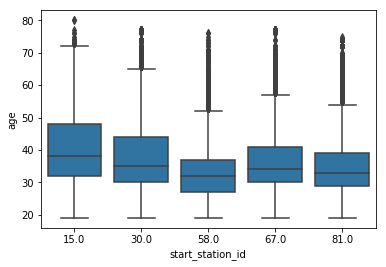

In [75]:
# Focus on busiest 5 start stations. 
# Rental counts for these range from 33716 to38461.
# Counts from left to right: 38461,37617,35092,34918,33716

base_color = sb.color_palette()[0]
sb.boxplot(x='start_station_id', y='age', data=df_age_busy, color=base_color)

#### Comments
<ul>
<li>Age by counts is similar across the plots.  </li>
<li>All stations show a common concentration of ages 28 to 48.  </li>
<li>Median age range: between 30 and 40 years  </li>
<li>Median age for renters at these busiest start stations fall within an 11 year range. </li>
</ul>

## ...

#### Focus on least busiest 5 start stations. Plot ages for individual station ids.

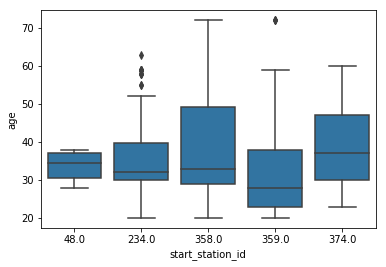

In [76]:
# Plot same for least busiest 5 start stations. 
# Rental counts for these ids from left to right: 174,91,52,25,11

base_color = sb.color_palette()[0]
sb.boxplot(x='start_station_id', y='age', data=df_age_notBusy, color=base_color);

#### Comments
<ul>
<li>Age by counts is dissimilar across the plots.  </li>
<li>All stations show a common concentration of ages 30 to 37. </li>
<li>Median age range: between 28 and 36 years  </li>
<li>Median age for renters at these busiest start stations fall within an 9 year range. </li>
</ul>


### Comparing age characteristic for busiest and least busiest start stations:
<ul>
<li>Median age for renters at the busiest start stations fall within an 11 year range.   </li>
<li> Median age for renters at the least busiest start stations fall within an 9 year range.  </li>
<li>Busiest start stations show a common concentration of ages 28 to 48.  </li>
<li> Least busiest start stations show a common concentration of ages 28 to 36.  </li>
</ul>


## ...
### Look at relationship between age and user_type

#### Look at relationship between age and user_type at busiest start stations

In [77]:
df_age_busy.user_type.value_counts()

Subscriber    149795
Customer       18578
Name: user_type, dtype: int64

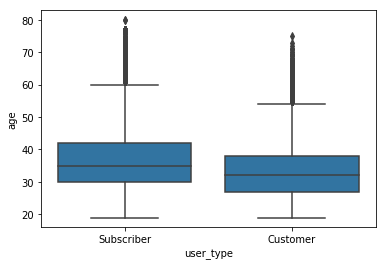

In [78]:
base_color = sb.color_palette()[0]
sb.boxplot(x='user_type', y='age', data=df_age_busy, color=base_color);

#### Comment
<ul>
<li>Median age for both subscribers and customers is similar, about 31-34.  </li>
<li>Note: subscribers outnumber customers 8 to 1. </li>
<li>Although counts are markedly different the bulk of customer and subscriber ages are similar.  </li>
</ul>

### ...
#### Look at age and user_type at least busy stations

In [79]:
df_age_notBusy.user_type.value_counts()

Subscriber    242
Customer       86
Name: user_type, dtype: int64

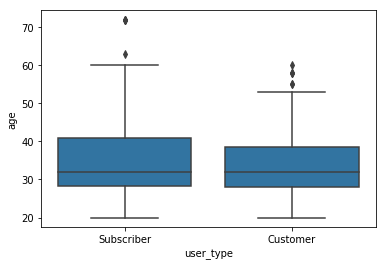

In [80]:
base_color = sb.color_palette()[0]
sb.boxplot(x='user_type', y='age', data=df_age_notBusy, color=base_color);

#### Comment
<ul>
<li>Median age for both subscribers and customers is similar, about 31.  </li>
<li>Note: subscribers outnumber customers about 3 to 1. </li>
    <li> Subscribers have a wider concentrated age grouping than customers. </li>
</ul>

## ...

### Comparing age and user_type characteristics for busiest and least busiest start stations:
<ul>
<li>Median age for subscribers and customers is similar, about 31.  </li>
<li>Subscribers outnumber customers. </li>

</ul>


### ...
### Look at relationship between age and gender

#### Look at relationship between age and gender at busiest start stations

In [81]:
df_age_busy.member_gender.value_counts()

Male      128156
Female     38756
Other       1461
Name: member_gender, dtype: int64

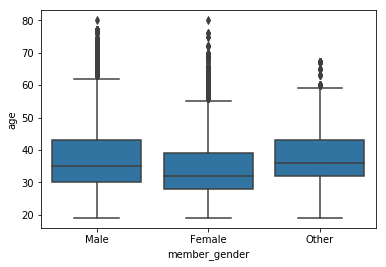

In [82]:
base_color = sb.color_palette()[0]
sb.boxplot(x='member_gender', y='age', data=df_age_busy, color=base_color);

#### Comments 
<ul>
<li>Age by counts is dissimilar across the plots, with males having the greatest concentration by far.  </li>
<li>All genders show a common concentration of ages 32 to 40. </li>
<li>Median age range: between 32 and 35 years  </li>
<li>Median age by gender at the busiest start stations fall within an 4 year range. </li>
<li> Those who rent bikes at the busiest start stations have a similar range of ages.</li>
 <li>Males range in age from 30 to 43, with a median age of 35.  </li>
 </ul>

## ...

#### Look at relationship between age and gender at least busiest start stations

In [83]:
df_age_notBusy.member_gender.value_counts()

Male      251
Female     68
Other       9
Name: member_gender, dtype: int64

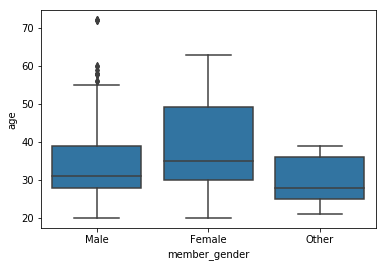

In [84]:
base_color = sb.color_palette()[0]
sb.boxplot(x='member_gender', y='age', data=df_age_notBusy, color=base_color);

#### Comments
<ul>
<li>Age by counts is dissimilar across the plots, with males having the greatest concentration by far.  </li>
<li>All genders show a common concentration of ages 30 to 36. </li>
<li>Median age range: between 25 and 31 years  </li> 
<li>Median age by gender at the least busiest start stations fall within an 7 year range. </li>
<li> Males who rent bikes at the least busy stations have an age grouping of ages, 28 to 38, an 11 year range. Women: age 30 to 50, a 20 year range. Other: age 25 to 36, a 12  year range.  </li>

 </ul>
 

## ...

### Comparing age and gender characteristics for busiest and least busiest start stations:
<ul>
<li>Median age for renters at the busiest start stations, 32 to 35, is higher than that for the least busiest start stations,  25 to 31   </li>

<li>Busiest start stations show a wider range of common concentration of ages 28 to 48. The least busiest start stations show a common concentration of ages 28 to 36.  </li>
<li> Males who rent bikes at both busiest and least busiest stations far outnumber females and others.  </li>  
 <li> Busiest start stations: males range in age from 30 to 43, with a median age at 35.  Least busiest start stations: 28 to 38 with median at 31.  </li>
</ul>


## ...
### Look at relationship between age and day rental began 

#### Look at relationship between age and day rental began at busiest start stations

In [85]:
df_age_busy.day_started.value_counts()

1    32409
2    31618
3    31273
0    29430
4    27272
5     9061
6     7310
Name: day_started, dtype: int64

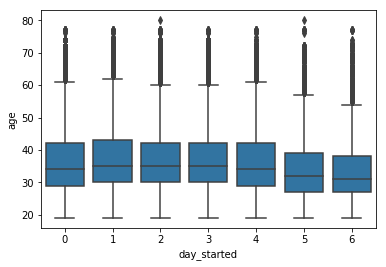

In [86]:
base_color = sb.color_palette()[0]
sb.boxplot(x='day_started', y='age', data=df_age_busy, color=base_color);

#### Comment
<ul>
<li> Median age for weekdays, about 34, is similar for weekends, about 32.5.  </li>
<li> Age for weekend rentals trends lower. </li>
<li> Note: weekend rental counts are at least 1/3 lower than weekdays (ref: value_counts). </li>
</ul>



#### Look at age and day_started for least busiest start stations

In [87]:
df_age_notBusy.day_started.value_counts()

3    59
6    57
2    50
0    47
4    43
5    36
1    36
Name: day_started, dtype: int64

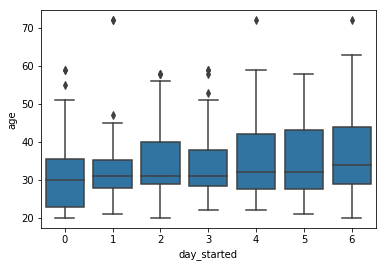

In [88]:
base_color = sb.color_palette()[0]
sb.boxplot(x='day_started', y='age', data=df_age_notBusy, color=base_color)

#### Comment
<ul>
<li> Median age for all days ranges between 30 and 33  </li>
<li> Rental counts are closely ranged: 36 to 59 </li>

</ul>

### Comparing age and rental day characteristics for busiest and least busiest start stations:
<ul>
<li> Median age for all days for rentals at the busiest and least busiest start stations is similar, about 30-31. </li>

</ul>

## ...
### Look at age and duration of rental

#### First, compare age and rental duration at busiest and least busiest start stations: side by side

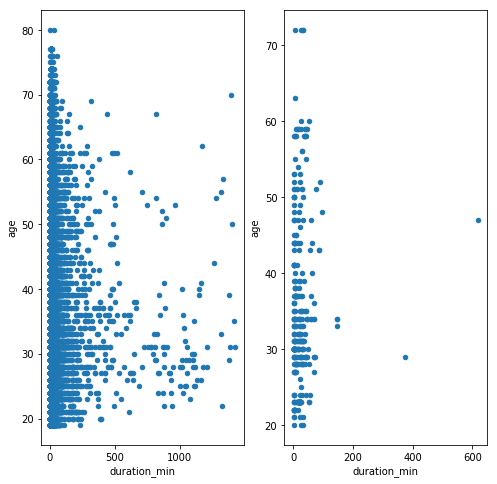

In [89]:
fig, ax = plt.subplots(ncols=2, figsize = [8,8])

df_age_busy.plot( x='duration_min', y='age', kind='scatter', ax=ax[0]);

df_age_notBusy.plot( x='duration_min', kind='scatter', y='age', ax=ax[1]);

#### Comment
<ul>
<li> Even with a difference in x scales the distribution of points shows fewer counts for longer rides in both busiest and least busiest stations as was shown in the univariate plots.  </li>
    <li>Age does not seem to be a limiting factor for either station type.  </li>
</ul>



#### Look now at stats and plot for busiest start station

In [90]:
# Look at duration_min stats and ranges for df_notBusy
df_age_busy.duration_min.describe()


count    168373.000000
mean         12.190482
std          28.796525
min           1.000000
25%           6.000000
50%           9.000000
75%          13.000000
max        1421.000000
Name: duration_min, dtype: float64

In [91]:
df_age_busy.age.describe()

count    168373.000000
mean         36.578068
std          10.211787
min          19.000000
25%          29.000000
50%          34.000000
75%          42.000000
max          80.000000
Name: age, dtype: float64

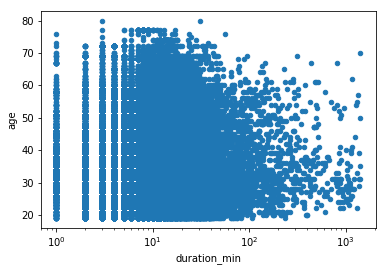

In [92]:
# Use log transformation to make data readable


df_age_busy.plot( x='duration_min', y='age', kind='scatter');
plt.xscale('log');

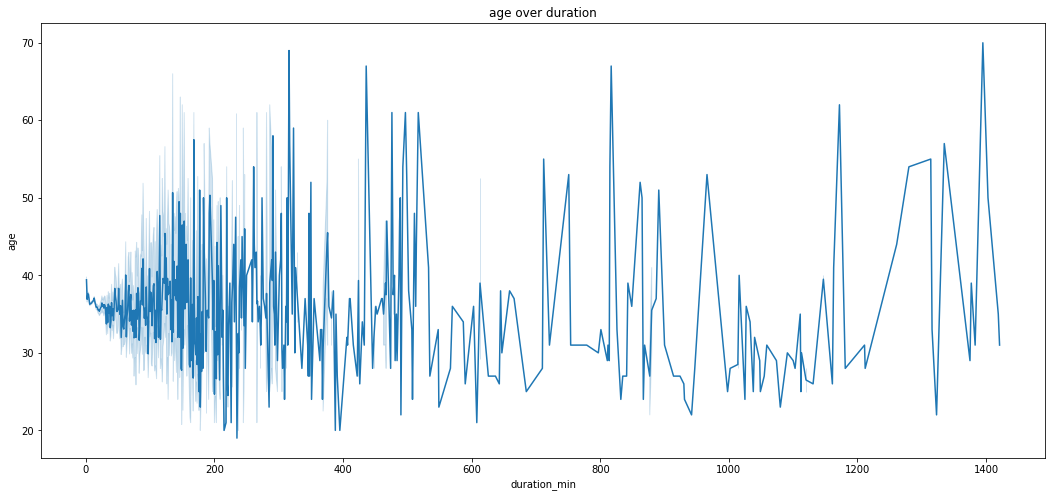

In [93]:
plt.figure(figsize=(18, 8))
sb.lineplot(x="duration_min", y="age", data=df_age_busy ).set_title('age over duration')
plt.show()

#### Comment
<ul>
<li>The stats are confirmed by the plots: 75% of renters are age 42 and lower and 75% of rental durations are 13 minutes and lower.  </li>
    <li>Ages 25 to 45 appear to have the most activity.  </li>
</ul>

### ...


#### Finally, look at stats and plot for least busiest start station

In [94]:
# Look at duration_min stats and ranges for df_notBusy
df_notBusy.duration_min.describe()

count    353.000000
mean      26.934844
std       65.110385
min        1.000000
25%        5.000000
50%       17.000000
75%       30.000000
max      937.000000
Name: duration_min, dtype: float64

In [95]:
df_notBusy.age.describe()

count    353.000000
mean      32.611898
std       13.984755
min        0.000000
25%       24.000000
50%       31.000000
75%       39.000000
max       72.000000
Name: age, dtype: float64

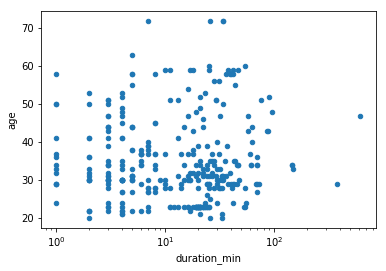

In [96]:
df_age_notBusy.plot( x='duration_min', kind='scatter', y='age');
plt.xscale('log');

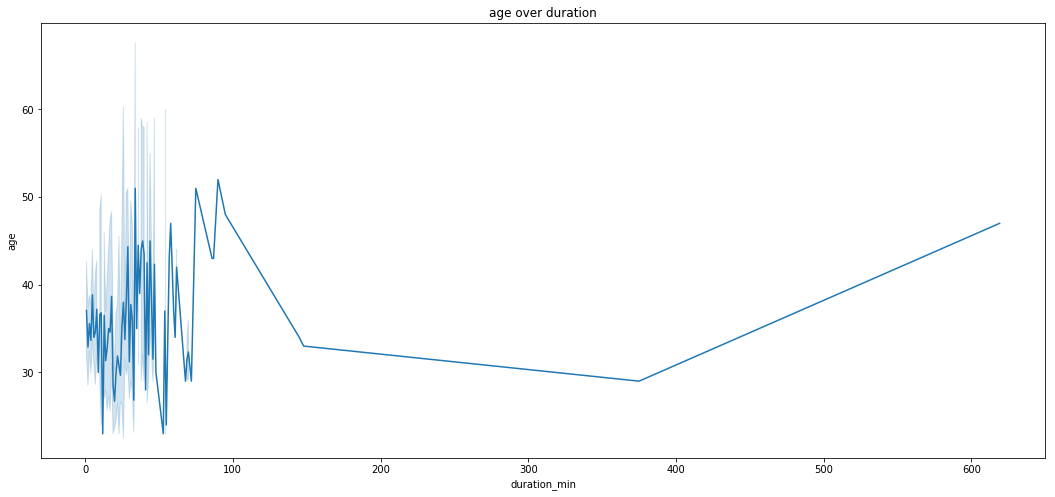

In [97]:
plt.figure(figsize=(18, 8))
sb.lineplot(x="duration_min", y="age", data=df_age_notBusy ).set_title('age over duration')
plt.show()

#### Comment
<ul>
<li>The stats for least busiest station are also confirmed by the plots: 75% of renters are age 39 and lower and 75% of rental durations are 30 minutes and lower.  </li>
        <li>Ages 30 to 40 appear to have the most activity.  </li>
</ul>


### Comparing age and duration of rental characteristics for busiest and least busiest start stations:
<ul>
<li> Median age for all days for rentals at the busiest and least busiest start stations is similar, about 30-31. </li>
        <li>At the busiest stations renters of ages 25 to 45 appear to have the most activity.  At the least busiest the range is a bit higher, 30 to 40. </li>
</ul>

## ...


## Comparisons with age completed. 
### Use age group (ages 14 -80) subset dataframes of df_busy and df_not busy for comparisons with all characteristics: df_age_busy and df_age_notBusy <br>

## Next: Comparisons with user_type.

### ...

### Look at user_type and member_gender for busiest and least busiest start stations

### ...

#### Look at user_type and member_gender for busiest start stations (df_age_busy)

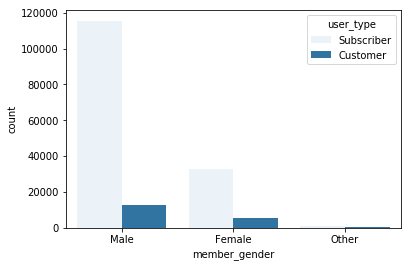

In [98]:
# Look at user type and member_gender using df_busy dataframe

base_color = sb.color_palette()[0]
sb.countplot(x='member_gender',hue='user_type', data=df_age_busy, color=base_color);

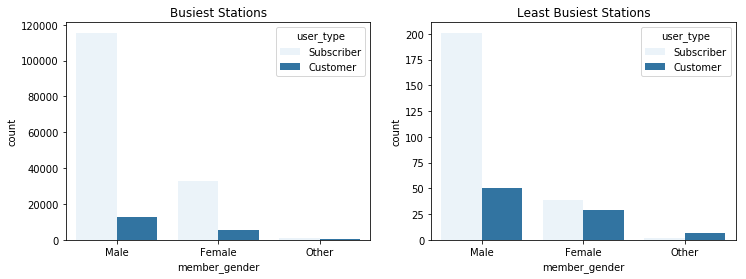

In [99]:
fig, ax = plt.subplots(ncols=2, figsize = [12,4])

base_color = sb.color_palette()[0]
sb.countplot(x='member_gender',hue='user_type', data=df_age_busy, color=base_color, ax=ax[0]).set_title('Busiest Stations');

sb.countplot(x='member_gender',hue='user_type', data=df_age_notBusy, color=base_color, ax=ax[1]).set_title('Least Busiest Stations');

#### Comment
<ul>
<li>Busiest: male subscribers far outcount females and others.  </li>
    <li>Least busiest: male subscribers also far outcount females and others.  </li>
</ul>

### Comparing user_type and member_gender: 
<ul>
<li>For busiest and least busiest start stations male subscribers far outcount females and others.  </li>
</ul>

### ...

### Look at user_type and day_started for busiest and least busiest start stations



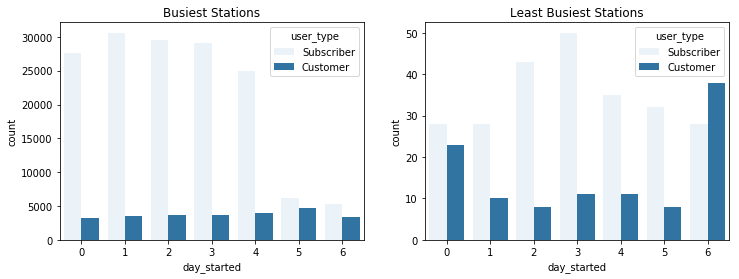

In [100]:
# Look at user_type and day rental started
fig, ax = plt.subplots(ncols=2, figsize = [12,4])

base_color = sb.color_palette()[0]
sb.countplot(x='day_started',hue='user_type', data=df_busy, color=base_color, ax=ax[0]).set_title('Busiest Stations');

sb.countplot(x='day_started',hue='user_type', data=df_notBusy, color=base_color, ax=ax[1]).set_title('Least Busiest Stations');

#### Comment
<ul>
<li>Busiest: weekday rentals are when most subscribers outcount other days. Weekend rentals are very low in comparison to weekday rentals and subscriber and customer counts are somewhat similar.  </li>
    <li>Least busiest: Tuesday through Saturday rentals are when most subscribers outcount customers. Sunday has the strongest showing by subscribers.  </li>
</ul>

### Comparing user_type and day of rental: 
<ul>
<li> There does not seem to be any basis for comparison when looking at the plots for busiest and least busiest start stations.  </li>
    <li>However, it is apparent that there is a significant difference in usage of the start stations.  </li>
</ul>

### ...

### Look at user_type and duration of rental for busiest and least busiest start stations 



#### Look at user_type and duration of rental for busiest start stations
#### Use log transformation to clarify lower ranges

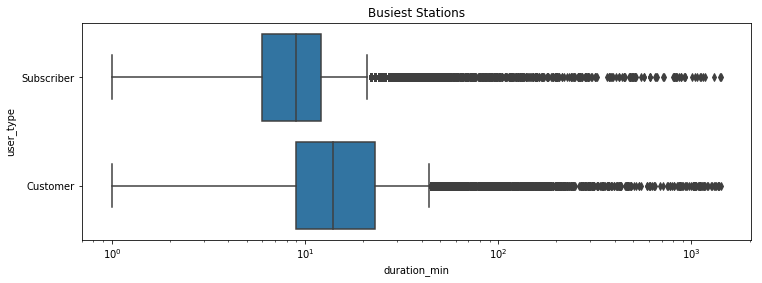

In [101]:
# Look at user_type and duration of rental for busiest start stations
fig, ax = plt.subplots(nrows=0, figsize = [12,4])
base_color = sb.color_palette()[0]

sb.boxplot(x='duration_min', y='user_type', data=df_age_busy, color=base_color).set_title('Busiest Stations')
plt.xscale('log');


#### Comment
<ul>
<li>Subscribers rent for shorter durations than do customers. </li>
<li> Subscribers have more outliers of rental periods. </li>
</ul>

#### Look at user_type and duration of rental for least busiest start stations 
#### Use log transformation to clarify lower ranges

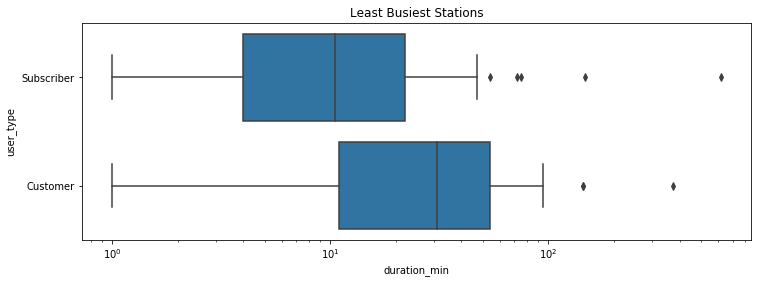

In [102]:
# Look at user_type and duration of rental for busiest start stations
fig, ax = plt.subplots(nrows=0, figsize = [12,4])
base_color = sb.color_palette()[0]
sb.boxplot(x='duration_min', y='user_type', data=df_age_notBusy, color=base_color).set_title('Least Busiest Stations')
plt.xscale('log');

#### Comment
<ul>
<li> Subscribers rent for shorter periods than do customers.  </li>
<li> Customers have a longer whisker for shorter trips.</li>

</ul>

### Comparing user_type and duration of rental characteristics for busiest and least busiest start stations:
<ul>
<li>For both busiest and least busiest start stations subscribers rent for shorters periods than do customers.  </li>
</ul>

### ...

## Comparisons with user_type completed.  <br>Next: Comparisons with member_gender.

## ...
### Look at gender and day_started for busiest and least busiest start stations


#### Look at gender and day_started for busiest and least busiest start stations

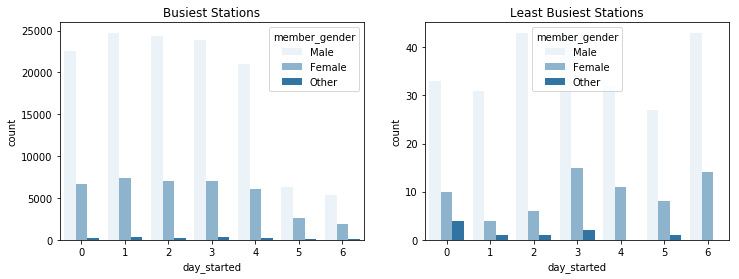

In [103]:
fig, ax = plt.subplots(ncols=2, figsize = [12,4])

base_color = sb.color_palette()[0]
sb.countplot(x='day_started',hue='member_gender', data=df_age_busy, color=base_color, ax=ax[0]).set_title('Busiest Stations');

#base_color = sb.color_palette()[0]
sb.countplot(x='day_started',hue='member_gender', data=df_age_notBusy, color=base_color, ax=ax[1]).set_title('Least Busiest Stations');

#### Comment
<ul>
<li> Busiest stations: males comprise the largest group of renters for each day, but it is clearly evident that most rentals begin on weekdays.  </li>
<li> Least busiest stations: males also comprise the largest group of renters for each day. Wednesday, Thursday and Saturday are slightly higher start days.</li>

</ul>

### Comparing member_gender and day_started characteristics for busiest and least busiest start stations:
<ul>
<li>For both busiest and least busiest start stations males comprise the largest group for each day. </li>
<li>Weekdays are the heaviest start days for male renters at the busiest start stations.    </li>
</ul>


## ...

### Look at gender and day_started duration of rental for busiest and least busiest start stations



#### Look at gender and day_started duration of rental for busiest start stations
#### Use log transformation to clarify lower ranges

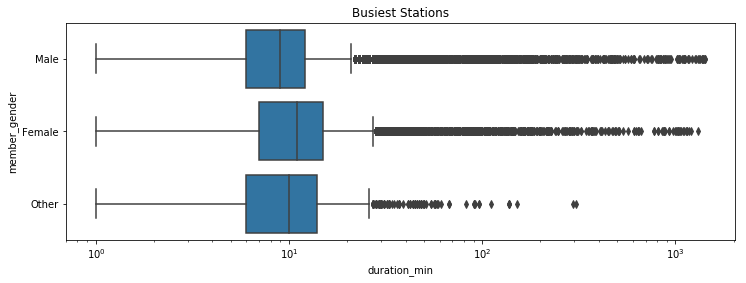

In [104]:
# Look at gender and day_started duration of rental for busiest start stations

fig, ax = plt.subplots(nrows=0, figsize = [12,4])
base_color = sb.color_palette()[0]
sb.boxplot(x='duration_min', y='member_gender', data=df_age_busy, color=base_color).set_title('Busiest Stations')
plt.xscale('log');

#### Comment
<ul>
<li>The medians are very similar for all genders, with that for males slightly lower.  </li>
<li> There is clearly a very similar concentration of rental periods for all genders.T</li>
<li> Others have fewest outliers. </li>
</ul>

#### Look at gender and day_started duration of rental for  least busiest start stations

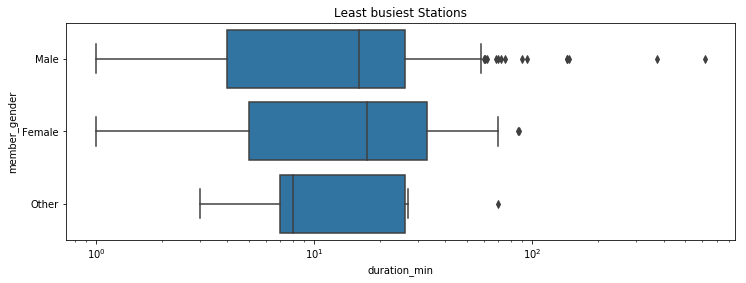

In [105]:
# Look at gender and day_started duration of rental for least busiest start stations

fig, ax = plt.subplots(nrows=0, figsize = [12,4])
base_color = sb.color_palette()[0]
sb.boxplot(x='duration_min', y='member_gender', data=df_age_notBusy, color=base_color).set_title('Least busiest Stations')
plt.xscale('log');

#### Comment
<ul>
<li>Unlike at the busiest stations, there is a marked difference in medians, with Others having lower medians for duration rental periods.  </li>
    <li> Each gender group has a distinct concentration block of rental periods.</li>
<li> Males have the most outliers.</li>

</ul>

### Comparing member_gender and duration of rental characteristics for busiest and least busiest start stations:
<ul>
<li>For the busiest stations there is a similarity across the genders for concentration of rental periods and for the mean duration in minutes. This is not duplicated for the least busiest stations. </li>
   
</ul>

### ...

## Comparisons with member_gender completed.  <br>Next: Comparisons with day_started.

## ...
#### Look at  day_started and duration_min for busiest  start stations

#### Use log transformation to clarify lower ranges

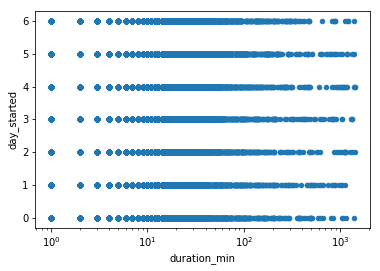

In [106]:
df_age_busy.plot( x='duration_min', y='day_started', kind='scatter');
plt.xscale('log');

#### Comment
<ul>
<li>Nothing jumps out as being different in this plot. Each day's 'scatter' is similar. </li>
</ul>

### ...

#### Look at day_started and duration_min for least busiest start station

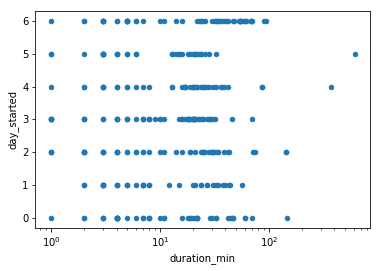

In [107]:
#### Look at day_started and duration_min 
df_age_notBusy.plot( x='duration_min', y='day_started', kind='scatter');
plt.xscale('log');

#### Comment
<ul>
<li>Unlike at the busiest stations, there are differences in rental durations here. Sunday appears to have the most concentration of rentals but not necessarily rentals with longer rental periods.  </li>
</ul>

### Comparing day_started and duration of rental characteristics for busiest and least busiest start stations:
<ul>
<li>For the busiest stations there is a lack of similarity across the days for rental durations.  </li>
<li> Longer rental durations do occur at the busiest start station. </li>   
</ul>

### ...

<a id='biSummary'></a>
## End Bivariate Exploration
### Discussion

#### Main focus of interest

My primary interest is in characterizing those who use the busiest 5 start_stations and on what days. 
A secondary interest is learning if the characteristics of busiest and least busiest stations vary.

### Some of the relationships observed in this part of the investigation. 

My focus centered on comparing characteristics of those who use the 5 busiest and 5 least busiest start stations. To accomplish this I created subsets of the original dataframe (12 months of activity) and isolated the 5 busiest, as df_busy, and the 5 least busy, as df_notBusy.

The bivariate exploration, then, was carried out using these two dataframe subsets. The most interesting relationships found centered on the user type and  gender of the renter. For both subsets, busiest and least busiest, subscribers were the majority of renters. When compared to gender it was confirmed that male subscribers comprised the majority. Boxplots helped to clarify the corresponding medians, outliers and concentrations of activity when comparing age/gender and age/user type. Also, there is a commonality of age groupings when comparing these characteristics.
 
The characteristic for duration of rental period proved interesting but did not seem to be relevant. The measure is in minutes and it cannot be determined if, for example, the rider stopped off for a coffee along the way and so the bike sat riderless for 30 minutes.

### Other interesting relationships 

Throughout the plots it was clear that the busiest and least busiest start stations had varying similarities. Where there are plot consistencies for most characteristics relating to  the busiest stations, there are none for these least busiest: user_type and day of rental, age and duration of rental. Because the least busiest stations have such little rental traffic it is interesting to note that there are indeed similarities.

### Questions from bivariate exploration
<ul>
<li>Does 'age' need to be narrowed in range in visualizations with other characteristics? 
<br><b>Answer</b>: yes. A subset was created and used for all comparisons with the age characteristic. Age included: 14 to 80.
</li><br>
<li>	Which user_types ride on which days?
<br><b>Answer</b>: subscribers. For both busiest and least busiest start stations the subscribers outnumbered the customers. Weekdays at the busiest stations showed the greatest differences.
</li>	<br>
<li>Males comprise the majority of renters at both busiest and least busiest start stations. Are there days when that isn't the case?
<br><b>Answer</b>: males do comprise the majority of rentals on every day of the week. 
</li>	<br>
<li>How does day of the rental impact gender use?
<br><b>Answer</b>: gender seems unaffected by day of the week at the busiest stations. Each type shows a proportionate chance from weekday to weekend. At the least busiest stations there is no pattern to reflect on.
</li>	<br>
</ul>


### Questions for multivariate exploration
What are the characteristics of those who use the busiest and least busiest start stations? To pin this down, take a multivariate look at how the categorical values of user types and gender are related with age and rental days.
<ul>
    <li>Will younger, male, subscribers be the majority of renters at both busiest and least busiest start stations? </li>
    <li>Are weekdays busier rental days? </li>
    <li>Is Monday the busiest rental day?  </li>
    <li> How do rental characteristics differ for the least busiest start station? </li>
    <li> What is the profile of a typical busiest start station rental? </li>
    <li> What is the profile of a typical least busiest start station rental? </li>    
</ul>




<a id='multivariate'></a>
## Multivariate exploration

## Process:
Using subsets of the original dataset, explore user characteristics within age parameters, 14-80,for the 5 busiest start stations, df_age_busy, and 5 least busiest start stations, df_age_notBusy
#### Characteristics to explore  further in the multivariate explorations: age, user_type, member_gender, day_started

- Categorical values: user_type, member_gender
- Numerical values: age, day_started
## ...

### Look at the relationships of categorical and numeric characteristics

### PairGrid plots


In [108]:
# Create function for sb PairGrid plot
# Ref: Class Ref: example diamond project, seaborn's PairGrid

categoric_vars = 'member_gender', 'user_type'


def boxgrid(x, y, **kwargs):

    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

<Figure size 720x720 with 0 Axes>

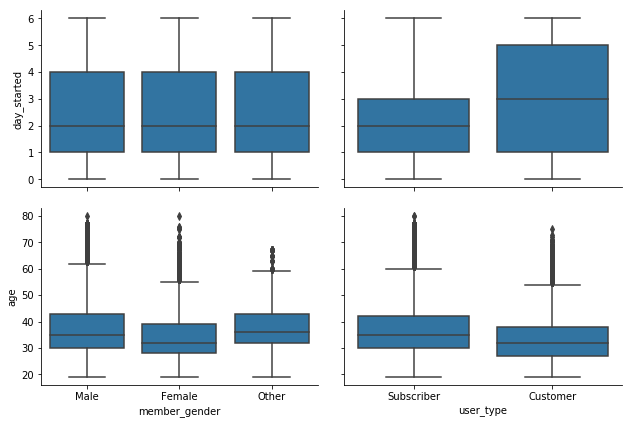

In [109]:
# Plot categoric values with numeric for busiest start stations

plt.figure(figsize = [10, 10])
 
g = sb.PairGrid(data = df_age_busy, y_vars = ['day_started', 'age'], x_vars= categoric_vars, height=3, aspect = 1.5) 

g.map(boxgrid)
plt.show();

#### Comment: Busiest Start Stations
These pairGrid visualizations tell a story about users of the busiest stations but need clarification:
<ul>
<li>Compared are member_gender and user_type as they relate to day_started in the first row and to age in the second.  </li>
<li>Since member_gender has 3 variables it is the left boxplots in each row that show the median and the bulk of renter distribution by genders at each day: the medians are similar for both day_started and age, others have fewer renters at the high point, all have outliers. </li>
<li>User_type is represented at the right of each row: the medians are higher for subscribers for day_started and only slightly different for age. Many more customers rent throughout the entire week, however this is not by count. Since this plot does not show the counts for each user type it erroneously suggests there are more customers.</li>
</ul>

#### This information does not sufficiently describe user characteristics. Since it does not include counts the plots tend to be misleading.
   

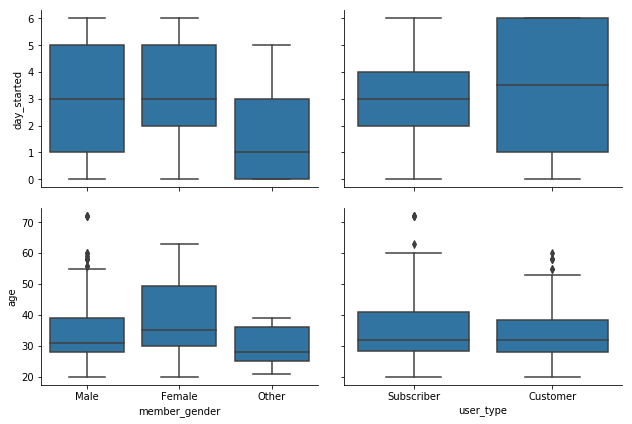

In [110]:
# Plot categoric values against numeric for leasst busiest start stations

g = sb.PairGrid(data = df_age_notBusy, y_vars = ['day_started', 'age'], x_vars= categoric_vars, height=3, aspect = 1.5)
g.map(boxgrid)
plt.show();

#### Comment: Least Busiest Start Stations
These pairGrid visualizations tell a story about users of the least busiest stations. It also needs clarification:
<ul>
<li>Compared are member_gender and user_type as they relate to day_started in the first row and to age in the second.  </li>
<li>Since member_gender has 3 variables it is the left boxplots in each row that show the median and the bulk of renter distribution by genders at each day: the medians show others are more distributed in the weekend days. For age comparison of genders, females have the widest age range.   </li> 
<li>User_type is represented at the right of each row. For day_started comparison of users,  more customers rent throughout the entire week, however this is not by count. Since this plot does not show the counts for each user type it erroneously suggests there are more customers. Median ages are similar.
 </li>
</ul>

####  Just as noted above for the busiest start stations, this information does not sufficiently describe user characteristics. Since it does not include counts the plots tend to be misleading.

## ...

### Furthering the exploration, a look at data presented in boxplots.

#### Following: side by side views of member_gender and user_types shown by day_started -- for busiest and least busiest start stations

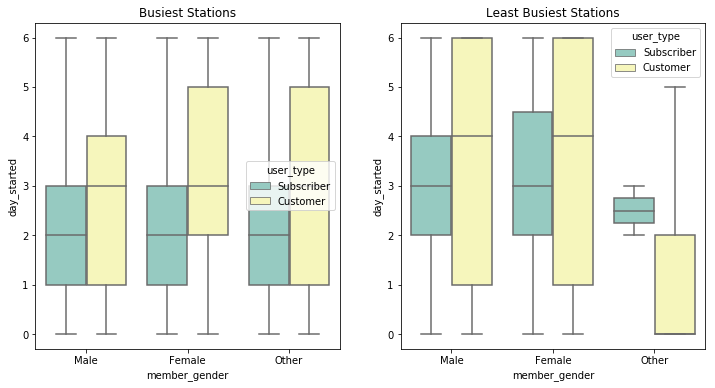

In [111]:
# Use boxplots to further investigate relationships
# Look at plots for categorical values and day_started for busiest and least busiest stations
fig, ax = plt.subplots(ncols=2, figsize = [12,6])
sb.boxplot(data=df_age_busy, x='member_gender', y='day_started', hue='user_type', palette='Set3', ax=ax[0]).set_title('Busiest Stations')
sb.boxplot(data=df_age_notBusy, x='member_gender', y='day_started', hue='user_type', palette='Set3', ax=ax[1]).set_title('Least Busiest Stations');

#### Comment: busiest and least busiest start stations
These boxplots offer a better comparison of characteristics than pairGrid plots. Note that counts are not included. Instead plots show rental info: medians, top line of box for 75% and height of box for 50%.<ul>
<li>Busiest start stations: genders who are subscribers are similar in median and distribution over weekdays Tuesday through Thursday. From previous explorations (see next plots) it is known that Monday is a lighter rental day as are Saturday and Sunday. 75% of all subscriber rentals take place Monday through Thursday, for all genders. Medians for user_type are identical with more females customers renting Wednesday through Saturday.  Other gender customers have a wider distribution over Monday through Saturday.</li>

<li>Least busiest start stations: there is an obvious difference between usage of the station types. The only similarities noted for least busy start stations are the medians for male and female subscribers (fall at Thursdays)and the medians for male and female customers (fall at Fridays). Male and female customers have a wider distribution (Tuesdays through Sundays) where others, both customers and subscribers, are shown to have more limited distributions.</li>

</ul>

## ...

### Following: countplots, counts for  member_gender by day_started


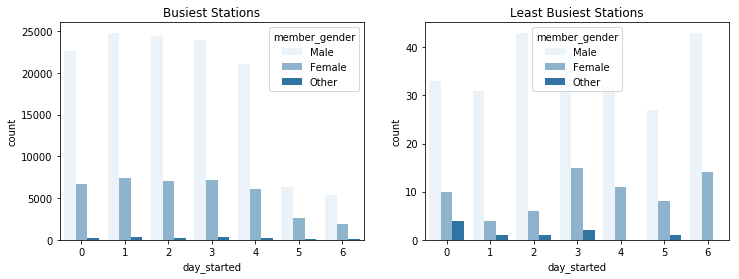

In [112]:
# Look at user_type, member_gender and day rental started
fig, ax = plt.subplots(ncols=2, figsize = [12,4])

base_color = sb.color_palette()[0]
sb.countplot(x='day_started',hue='member_gender', data=df_busy, color=base_color, ax=ax[0]).set_title('Busiest Stations');

sb.countplot(x='day_started',hue='member_gender', data=df_notBusy, color=base_color, ax=ax[1]).set_title('Least Busiest Stations');

#### These countplots show counts that further clarify relationships. 
<ul>
<li>Males clearly outnumber other genders for busiest and least busiest start stations on every day of the week. Note that Monday is NOT the busiest rental day in either plot.  </li>
</ul>

### Following: side by side views of member_gender and user_types shown by age -- for busiest and least busiest start stations

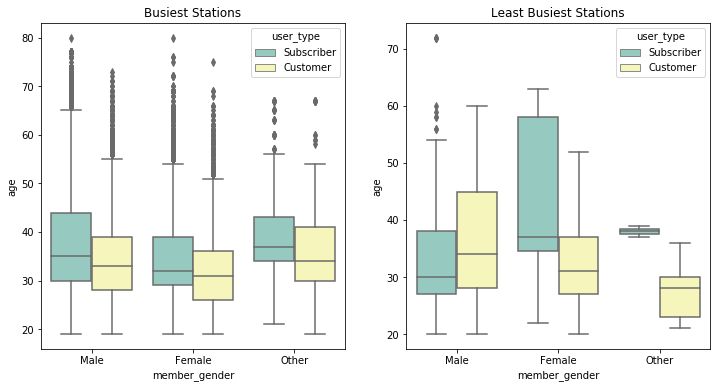

In [113]:

# Look at plots for categorical values and age for busiest and least busiest stations
fig, ax = plt.subplots(ncols=2, figsize = [12,6])
sb.boxplot(data=df_age_busy, x='member_gender', y='age', hue='user_type', palette='Set3',notch=False, ax=ax[0]).set_title('Busiest Stations')
sb.boxplot(data=df_age_notBusy, x='member_gender', y='age', hue='user_type', palette='Set3', notch=False, ax=ax[1]).set_title('Least Busiest Stations');

#### Comment: busiest and least busiest start stations
These boxplots offer a better comparison of characteristics than pairGrid plots<ul>
<li>Busiest start stations: Ages of renters fall between 28 and 44, for males it is 30 to 44. Younger males do make up the majority of renters; this is more easily seen in the next plot. Interestingly there is a distribution consistency for all genders, subscribers as well as customers.</li>

<li>Least busiest start stations: Just as for the comparison with day_started, this plot also shows varying levels of medians and distributions with other subscribers comprising the most compact.Younger males do comprise the majority of male subscriber renters with 75% below the age of 38. Counts provided in a following chart will confirm this for younger males. For male customers the distribution is broader and 75% are below the age of 45.</li>

</ul>

## ...

### Folowing: countplots, counts for member_gender by age

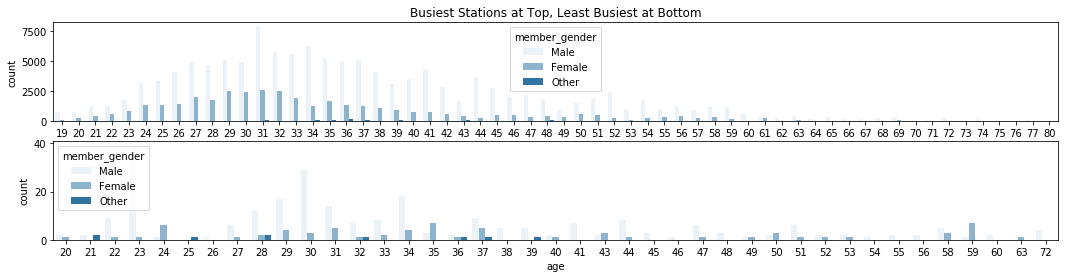

In [114]:
# Look at user_type, member_gender and age
fig, ax = plt.subplots(nrows=2, figsize = [18,4])

base_color = sb.color_palette()[0]
sb.countplot(x='age',hue='member_gender', data=df_age_busy, color=base_color, ax=ax[0]).set_title('Busiest Stations at Top, Least Busiest at Bottom');


sb.countplot(x='age',hue='member_gender', data=df_age_notBusy, color=base_color, ax=ax[1]);

#### These countplots show counts that further clarify younger males are the majority of renters. 
<ul>
<li>Males clearly outnumber other genders at every age.   </li>
</ul>

### Look at another comparison of categorical and numeric value: catplot 

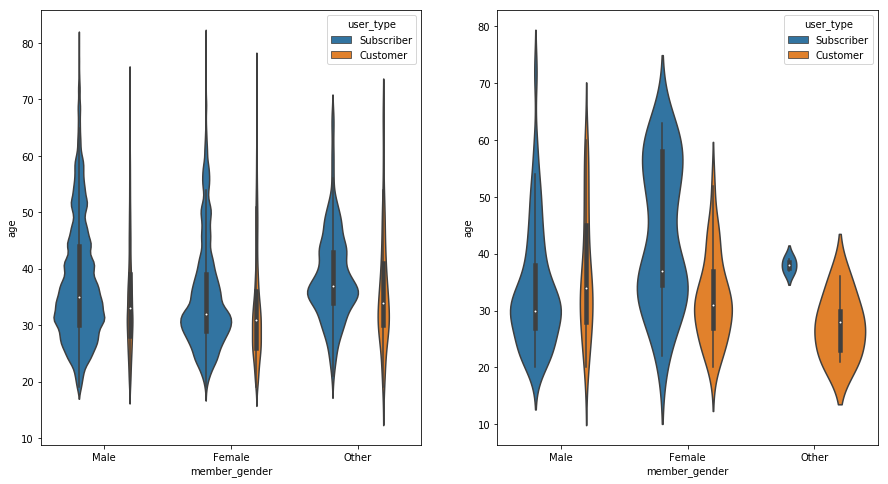

In [115]:
fig, ax = plt.subplots(ncols=2, figsize = [15,8])
#plt.figure(figsize = [10, 10])
sb.catplot(data=df_age_busy, x='member_gender', y='age',ax=ax[0], hue='user_type', kind="violin", aspect=2, scale='count');

sb.catplot(data=df_age_notBusy, x='member_gender', y='age',ax=ax[1], hue='user_type', kind="violin", aspect=2, scale='count');

plt.close(2)
plt.close(3)


#### Comment: 
These violin plots provide a better clarification than the boxplot and pairGrid plot as it includes the boxplot as well as an underlying distribution. Note gender counts for the busiest start station is larger (168,373). As the rental counts for least busiest stations is small (328) the plot shows distributions and does not represent true counts and may be 'misleadingly smooth'. ( Ref:1)value_counts in following cells;2) https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot )


<ul>
<li>Busiest start station (left): Male subscribers outnumber the rest by 3 to 1, have a median age of 35, and age ranges from 30 to 44. Female subscribers have a lower median age with an overall lower age distribution and longer outlier whisker. </li>
</ul>
<ul>
<li>Least busiest start station(right): Although the total count for this plot is only 328, 251 are males and it is valid to report the median age for male subcribers is at 30, and males comprise the majority of renters. </li>

</ul>

In [116]:
df_age_notBusy.start_station_id.value_counts()

234.0    162
359.0     89
358.0     48
374.0     21
48.0       8
Name: start_station_id, dtype: int64

In [117]:
df_age_busy.start_station_id.value_counts()

67.0    36010
30.0    33571
58.0    33247
15.0    33187
81.0    32358
Name: start_station_id, dtype: int64

In [118]:
df_age_notBusy.member_gender.value_counts() # n= 328

Male      251
Female     68
Other       9
Name: member_gender, dtype: int64

In [119]:
df_age_busy.member_gender.value_counts() # n= 168373

Male      128156
Female     38756
Other       1461
Name: member_gender, dtype: int64

In [120]:
df_age_notBusy.user_type.value_counts() # n= 328 = member_gender

Subscriber    242
Customer       86
Name: user_type, dtype: int64

In [121]:
df_age_busy.user_type.value_counts() # n= 168373 = member_gender

Subscriber    149795
Customer       18578
Name: user_type, dtype: int64

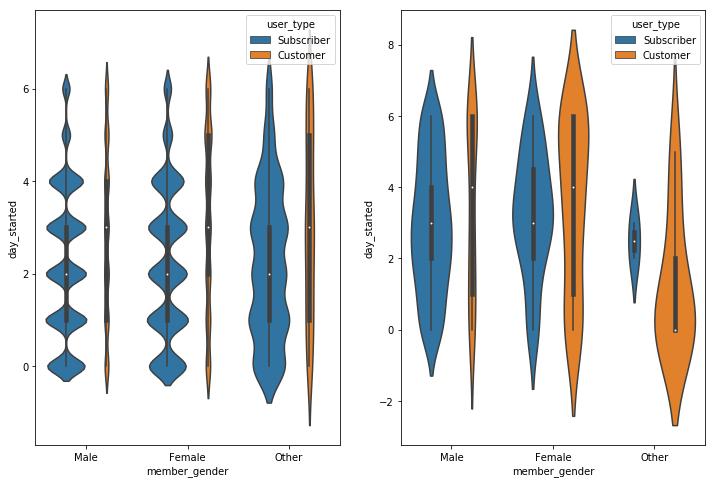

In [122]:
fig, ax = plt.subplots(ncols=2, figsize = [12,8])
#plt.figure(figsize = [10, 10])
sb.catplot(data=df_age_busy, x='member_gender', y='day_started',ax=ax[0], hue='user_type', kind="violin", aspect=2, scale='count');
sb.catplot(data=df_age_notBusy, x='member_gender', y='day_started',ax=ax[1], hue='user_type', kind="violin", aspect=2, scale='count');
plt.close(2)
plt.close(3)

#### Comment: 
For quick reference: Note gender counts for the busiest start station is larger (168,373). As the rental counts for least busiest stations is small (328) the plot shows distributions and does not represent true counts and may be 'misleadingly smooth'. .( Ref:1)value_counts in following cells;2) https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot )

<ul>
<li>Busiest start station (left): Male subscribers outnumber the rest by 3 to 1, have a median age of 35, and age ranges from 30 to 44. Female subscribers have a lower median age with an overall lower age distribution and longer outlier whisker. </li>
</ul>
<ul>
<li>Least busiest start station(right): Although the total count for this plot is only 328, 251 are males and it is valid to report the median age for male subcribers is at 30, and males comprise the majority of renters. </li>

</ul>


<a id='multiSummary'></a>
## End Multivariate Exploration

## Discussion

The multivariate exploration provided a way to view the interaction of qualitative and quantitive characteristics in a variety of plots, some better than others. The side by side, and row by row presentations gave a different perspective even as they confirmed the findings in previous explorations.
<br><br>
Because of the vast difference in rental activity between the busiest and least busiest stations the multivariate exploration provided a deeper probe into the underlying factors. There are few similarities. Among them is the typical renter: younger male subscribers. The most dissimilar: Sundays are the busiest rental day. The cause of the sporadic daily rental activity was not a part of this investigation but it is likely that these stations are located in areas where younger male subscribers do not live. 
<br><br>
That noted, it became clearer that younger male subscribers renting at the busiest stations used rentals mostly during the work week, leading to the assumption that rental bikes were used as transportation to/from a workplace. 

<br>
The best way to summarize the observed relationships in this part of the investigation is to answer the questions posed prior to beginning the section:

<ul>
<li>  Will younger, male, subscribers be the majority of renters at both busiest and least busiest start stations? <br><b>Answer</b>: yes. Males outnumbered females and other genders by 3 to 1. Even so, it was confirmed that the majority of male renters were subscribers and tended to be younger.</li>

<li> Are weekdays busier rental days? <br><b>Answer</b>: Yes, for busiest start stations; no for the least busiest where there were no compelling patterns of rentals.   </li>

<li>Is Monday the busiest rental day? <br><b>Answer</b>:No, for both station types. Although at the busiest stations the preponderance of rentals occurred during the work week, Monday rental were somewhat less than the other weekdays. </li>

<li>  How do rental characteristics differ for the least busiest start station? <br><b>Answer</b>:Differences: volume of rentals, pattern-less activity across days, fewer customer than subcriber rentals, wider distribution of ages with minor peaks primarily seen for male renters</li>
<li>What is the profile of a typical busiest start station rental? <br><b>Answer</b>:Male, ages 30 to 44, subscriber, weekday rentals.  </li>
<li>  What is the profile of a typical least busiest start station rental? <br><b>Answer</b>:Male, ages 28 to 34, subscriber, Sunday is heaviest rental day. </li>
</ul>

## ...

<br>

<a id='ref'></a>
### <b>References:</b>
- Project Examples, Class Notes
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot
- https://matplotlib.org/tutorials/
- https://seaborn.pydata.org/
- https://seaborn.pydata.org/tutorial.html
- https://www.youtube.com/watch?v=BhHOdKyFzyQ  boxplot   
- https://www.youtube.com/watch?v=cLHwwRgny5g  violinplot
- Other: StackOverflow exchanges too numerous to list.

## ...

### End of Program
[Back to Top](#top)


